<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1631]:
#Importation de la librairie Pandas
import pandas as pd

In [1632]:
#Importation de la librairie plotly express
import plotly.express as px

In [1633]:
# Import de la librairie Numpy
import numpy as np

In [1634]:
# Import de la librairie skimpy
from skimpy import skim

In [1635]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

# pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [1637]:
# Après transforamtion des fichiers .xlsx en .csv
web = pd.read_csv('web.csv', sep=';')
erp = pd.read_csv('erp.csv', sep=';')
liaison = pd.read_csv('liaison.csv', sep=';')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [1640]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [1641]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
 5   purchase_price  825 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.8+ KB


In [1642]:
skim(erp)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 825    │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ product_id         │   0 │      0 │     5163 │    902.6 │   3847 │  4348 │  4907 │  5805 │  7338 │ ██▃▅▂▂  │  │
│ │ onsale_web         │   0 │      0 │   0.8679 │   0.3388 │      0 │     1 │     1 │     1 │     1 │ ▁    █  │  │
│ │ stock_quantity     │   0 │      0 │    21.59 │    21.93 │    -10 │     7 │    18 │    30 │   145 │   ██▁   │  │
│ └────────────────────┴─────┴────────┴──────────┴──────────┴────────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃         ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min     ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ price      │  0 │    0 │ 9        │ 14,05      │ -20     │ 99         │      3.43 │          1 │       825 │  │
│ │ stock_stat │  0 │    0 │ instock  │ outofstock │ instock │ outofstock │      7.33 │          1 │       825 │  │
│ │ us         │    │      │          │            │         │            │           │            │           │  │
│ │ purchase_p │  0 │    0 │ 8        │ 137,81     │ 10,01   │ 99         │       4.5 │          1 │       825 │  │
│ │ rice       │    │      │          │            │         │            │           │            │           │  │
│ └────────────┴────┴──────┴──────────┴────────────┴─────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1643]:
#Afficher les 5 premières lignes de la table
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,"24,2",16,instock,"12,88"
1,3849,1,"34,3",10,instock,"17,54"
2,3850,1,"20,8",0,outofstock,"10,64"
3,4032,1,"14,1",26,instock,"6,92"
4,4039,1,46,3,outofstock,"23,77"


In [1644]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print()
print(erp.loc[erp['product_id'].duplicated(keep=False)])
print(f'il y a {erp['product_id'].duplicated(keep=False).sum()} doublon(s) dans la colonne product_id')
print()


Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []
il y a 0 doublon(s) dans la colonne product_id



In [1645]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print()
print('-' * 110)
print(f'liste des valeurs uniques de la colonne stock_status{erp['stock_status'].unique().tolist()}')
print()
# Les colonnes 'stock_satus' et 'stock_quantity' devraient être liées. 
# Quand 'stock_status'=outofstokc, stock_quantity devrait être égal à 0
incoherence = erp.loc[(erp['stock_status'] == 'outofstock') & (erp['stock_quantity'] != 0)].shape[0]
print(f'il y a {incoherence} lignes dans lesquelles la quantite en stock est incohérente par rapport au statut de stock du produit')
print('-' * 110)
print()


--------------------------------------------------------------------------------------------------------------
liste des valeurs uniques de la colonne stock_status['instock', 'outofstock']

il y a 3 lignes dans lesquelles la quantite en stock est incohérente par rapport au statut de stock du produit
--------------------------------------------------------------------------------------------------------------



In [1646]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
erp['stock_status_2'] = np.where(erp['stock_quantity'] == 0, 'outofstock', 'instock')
erp.head(1)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,"24,2",16,instock,"12,88",instock


In [1647]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
erp["stock_status"] == erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [1648]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
print ()
print('-' * 60)
print(f'''Il y a {(erp['stock_status'] == erp['stock_status_2']).sum()} lignes de correspondances entre stock_status et
stosk_status_2, {erp.shape[0] - ((erp['stock_status'] == erp['stock_status_2']).sum()) } ne correspondent pas. ''')
print('-' * 60)
print ()


------------------------------------------------------------
Il y a 821 lignes de correspondances entre stock_status et
stosk_status_2, 4 ne correspondent pas. 
------------------------------------------------------------



In [1649]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
diff_stock_status = erp[erp['stock_status'] != erp['stock_status_2']]
print(diff_stock_status[['product_id', 'stock_status', 'stock_status_2']])

     product_id stock_status stock_status_2
4          4039   outofstock        instock
398        4885      instock     outofstock
449        4973   outofstock        instock
573        5700   outofstock        instock


In [1650]:
#Corriger la ou les données incohérentes
erp.loc[erp['product_id'] == 4039, 'stock_status'] = 'instock'
erp.loc[erp['product_id'] == 4885, 'stock_status'] = 'outofstock'
erp.loc[erp['product_id'] == 4973, 'stock_status'] = 'instock'
erp.loc[erp['product_id'] == 5700, 'stock_status'] = 'instock'
#Verification en utilisant le même code que plus haut pour afficher les problemes
diff_stock_status_2 = erp[erp['stock_status'] != erp['stock_status_2']]
print(diff_stock_status_2[['product_id', 'stock_status', 'stock_status_2']])

Empty DataFrame
Columns: [product_id, stock_status, stock_status_2]
Index: []


In [1651]:
# Vérification visuelle
liste_id=[4039, 4885, 4973, 5700]
erp.loc[erp['product_id'].isin(liste_id)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46,3,instock,"23,77",instock
398,4885,1,"18,7",0,outofstock,"9,66",outofstock
449,4973,0,10,-10,instock,"4,96",instock
573,5700,1,"44,5",-1,instock,"22,3",instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [1654]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print()
print(f'''Nombres d\'article avec un prix non renseigné: {
    ((erp['price'].isna()) | (erp['price'] == '') | (erp['price'].str.lower() == 'nan') | (erp['price'] == '0') | 
    (erp['price'].str.contains('-', na=False))).sum()}
    ''') #Saisir l'instruction manquante dans la fonction format
print()
print(erp.loc[(erp['price'].isna()) | (erp['price'] == '') | (erp['price'].str.lower() == 'nan') | (erp['price'] == '0') | 
    (erp['price'].str.contains('-', na=False)), ['price']])
#Afficher le prix minimum de la colonne "price"
print(f'Le prix minimum de la colonne price est {erp['price'].min()}')
#Afficher le prix maximum de la colonne "price"
print(f'Le prix maximum de la colonne price est {erp['price'].max()}')
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print(f'Les prix inférieurs à 0: {erp.loc[erp['price'].str.contains('-', na=False ), 'price'].tolist()} ')
print()

## Attention, la colonne 'price' est de type object


Nombres d'article avec un prix non renseigné: 3
    

    price
151   -20
469    -8
739  -9,1
Le prix minimum de la colonne price est -20
Le prix maximum de la colonne price est 99
Les prix inférieurs à 0: ['-20', '-8', '-9,1'] 



In [1655]:
# Visualisation des lignes dont le prix est négatif
erp['price'] = pd.to_numeric(erp['price'].str.replace(',', '.'), errors='coerce') # remplacement des virgules par des points, et transforamtion en numérique
erp.loc[erp['price'] <= 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,"10,33",outofstock
469,5017,0,-8.0,0,outofstock,"4,34",outofstock
739,6594,0,-9.1,19,instock,"4,61",instock


In [1656]:
# Je propose de les passer en positif
erp.loc[erp['price'] < 0, 'price'] *= -1
print()
print(f'Nombre de lignes pour lesquelles le prix est négatif: {erp.loc[erp['price'] < 0, 'price'].sum()}')
print()


Nombre de lignes pour lesquelles le prix est négatif: 0.0



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [1658]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print()
print(f'Minimum de la colonne stock_quantity {erp['stock_quantity'].min()}')

#Afficher la quantité maximum de la colonne "stock_quantity"
print(f'Maximum de la colonne stock_quantity {erp['stock_quantity'].max()}')

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print(f'Les stocks négatifs: {erp.loc[erp['stock_quantity'] < 0, 'stock_quantity'].tolist()}')
print()


Minimum de la colonne stock_quantity -10
Maximum de la colonne stock_quantity 145
Les stocks négatifs: [-10, -1]



In [1659]:
# Visualisation des lignes dont le stock est négatif
erp.loc[erp['stock_quantity'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,instock,"4,96",instock
573,5700,1,44.5,-1,instock,"22,3",instock


In [1660]:
# Je propose de passer ces valeurs à 0
erp.loc[erp['stock_quantity'] < 0, 'stock_quantity'] = 0
erp.loc[erp['stock_quantity'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


In [1661]:
# Modification de leur statut de stock
erp.loc[erp['product_id'] == 4973, 'stock_status'] = 'outofstock'
erp.loc[erp['product_id'] == 5700, 'stock_status'] = 'outofstock'
liste_4973_5700 = [4973, 5700]
erp.loc[erp['product_id'].isin(liste_4973_5700)]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,0,outofstock,"4,96",instock
573,5700,1,44.5,0,outofstock,"22,3",instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [1663]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print()
print(f'Les valeurs présentes dans la colonne onsale_web sont les suivantes {erp['onsale_web'].unique().tolist()}') 
print()
print('Certainement que onsale_web = 1 sigifie que l\'article est vendu par internet.') 
print()


Les valeurs présentes dans la colonne onsale_web sont les suivantes [1, 0]

Certainement que onsale_web = 1 sigifie que l'article est vendu par internet.



In [1664]:
#Quelles sont les colonnes à conserver selon vous?
print()
print(f'Seule à mon sens la colonne stock_status_2 est à supprimer')
print()


Seule à mon sens la colonne stock_status_2 est à supprimer



In [1665]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
erp = erp.drop('stock_status_2', axis = 1)
erp.head(1)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,"12,88"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [1667]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print()
print(f'Il y a {erp['purchase_price'].isna().sum()} valeurs manquantes dans la colonne pruchase_price ')
print(erp.loc[erp['purchase_price'].isna()])
#Afficher le prix minimum de la colonne "purchase_price"
print()
print(f'{erp['purchase_price'].min()} est le prix minimum de la colonne purchase_price')

#Afficher le prix maximum de la colonne "purchase_price"
print()
print(f'{erp['purchase_price'].max()} est le prix maximum de la colonne purchase price ')
print()
print(f'Type de données de la colonne \'purchae_price\': {erp['purchase_price'].apply(type).value_counts()}')


Il y a 0 valeurs manquantes dans la colonne pruchase_price 
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []

10,01 est le prix minimum de la colonne purchase_price

99 est le prix maximum de la colonne purchase price 

Type de données de la colonne 'purchae_price': purchase_price
<class 'str'>    825
Name: count, dtype: int64


In [1668]:
# Mise en numérique des valeurs de la colonne 'purchase_price'
erp['purchase_price'] = pd.to_numeric(erp['purchase_price'].str.replace(',', '.'), errors='coerce')

In [1669]:
# Vérification des valeurs 
skim(erp)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 825    │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id        │   0 │      0 │     5163 │    902.6 │  3847 │  4348 │   4907 │   5805 │   7338 │ ██▃▅▂▂ │  │
│ │ onsale_web        │   0 │      0 │   0.8679 │   0.3388 │     0 │     1 │      1 │      1 │      1 │ ▁    █ │  │
│ │ price             │   0 │      0 │    32.28 │     26.6 │   5.2 │  14.5 │   24.3 │     42 │    225 │   █▂   │  │
│ │ stock_quantity    │   0 │      0 │     21.6 │    21.92 │     0 │     7 │     18 │     30 │    145 │   █▄   │  │
│ │ purchase_price    │   0 │      0 │    16.94 │    14.56 │  2.74 │  7.59 │  12.71 │  22.02 │  137.8 │   █▁   │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴───────┴───────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃         ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min     ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ stock_stat │  0 │    0 │ instock  │ outofstock │ instock │ outofstock │      7.33 │          1 │       825 │  │
│ │ us         │    │      │          │            │         │            │           │            │           │  │
│ └────────────┴────┴──────┴──────────┴────────────┴─────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1670]:
# Vérificaiton supplémentaire
erp_colonnes=erp.columns.tolist()
for col in erp_colonnes:
    print(erp[col].apply(type).value_counts())

product_id
<class 'int'>    825
Name: count, dtype: int64
onsale_web
<class 'int'>    825
Name: count, dtype: int64
price
<class 'float'>    825
Name: count, dtype: int64
stock_quantity
<class 'int'>    825
Name: count, dtype: int64
stock_status
<class 'str'>    825
Name: count, dtype: int64
purchase_price
<class 'float'>    825
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

## Types de données et suppression de colonnes inutiles

In [1673]:
#Dimension du dataset
#Nombre d'observations
print()
print(f'Il y a {web.shape[0]} observations dans la table web')
#Nombre de caractéristiques
print()
print(f'Il y a {web.shape[1]} caractéristiques dans la table web ')
print()


Il y a 1513 observations dans la table web

Il y a 29 caractéristiques dans la table web 



In [1674]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  product_type           1429 non-null   object 
 13  post_title             1430 non-null   object 
 14  post_excerpt           716 non-null    object 
 15  post

In [1675]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
web_colonnes = web.columns.tolist()
for col in web_colonnes:
    print(web[col].apply(type).value_counts())

sku
<class 'str'>      1428
<class 'float'>      85
Name: count, dtype: int64
virtual
<class 'int'>    1513
Name: count, dtype: int64
downloadable
<class 'int'>    1513
Name: count, dtype: int64
rating_count
<class 'int'>    1513
Name: count, dtype: int64
average_rating
<class 'float'>    1513
Name: count, dtype: int64
total_sales
<class 'float'>    1513
Name: count, dtype: int64
tax_status
<class 'float'>    797
<class 'str'>      716
Name: count, dtype: int64
tax_class
<class 'float'>    1513
Name: count, dtype: int64
post_author
<class 'float'>    1513
Name: count, dtype: int64
post_date
<class 'str'>      1430
<class 'float'>      83
Name: count, dtype: int64
post_date_gmt
<class 'str'>      1430
<class 'float'>      83
Name: count, dtype: int64
post_content
<class 'float'>    1513
Name: count, dtype: int64
product_type
<class 'str'>      1429
<class 'float'>      84
Name: count, dtype: int64
post_title
<class 'str'>      1430
<class 'float'>      83
Name: count, dtype: int64
post_

In [1676]:
# Autre exploration
skim(web)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1513   │ │ string      │ 16    │                                                          │
│ │ Number of columns │ 29     │ │ float64     │ 10    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                                              ┃ NA                ┃ NA %             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ tax_class                                                           │              1513 │              100 │  │
│ │ post_content                                                        │              1513 │              100 │  │
│ │ post_password                                                       │              1513 │              100 │  │
│ │ post_content_filtered                                               │              1513 │              100 │  │
│ └─────────────────────────────────────────────────────────────────────┴───────────────────┴──────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %                ┃ mean   ┃ sd       ┃ p0   ┃ p25  ┃ p50 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ virtual          │   0 │                   0 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ downloadable     │   0 │                   0 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ rating_count     │   0 │                   0 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ average_rating   │  83 │   5.485789821546597 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ total_sales      │  83 │   5.485789821546597 │  8.223 │    6.722 │  -56 │    5 │   8 │  11 │  122 │   ▁█   │  │
│ │ post_author      │  83 │   5.485789821546597 │  1.999 │  0.03738 │    1 │    2 │   2 │   2 │    2 │      █ │  │
│ │ post_parent      │  83 │   5.485789821546597 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ menu_order       │  83 │   5.485789821546597 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ │ comment_count    │  83 │   5.485789821546597 │      0 │        0 │    0 │    0 │   0 │   0 │    0 │     █  │  │
│ └──────────────────┴─────┴─────────────────────┴────────┴──────────┴──────┴──────┴─────┴─────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃     ┃           ┃          ┃           ┃ 

In [1677]:
# Vérification des types de données dans les colonnes

web_colonnes=web.columns.tolist()
colonnes_plusieur_type = []
for col in web_colonnes:
    nb_type = web[col].apply(type).value_counts()
    if len(nb_type) > 1:
        colonnes_plusieur_type.append(col)
print()
print(f'Les colonnes suivantes ont plusieurs valeurs de différents types {colonnes_plusieur_type}')
print()


Les colonnes suivantes ont plusieurs valeurs de différents types ['sku', 'tax_status', 'post_date', 'post_date_gmt', 'product_type', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt', 'guid', 'post_type', 'post_mime_type']



In [1678]:
#Selon vous, quelles sont les colonnes à conserver ?
colonne_nulle=[]
for col in web_colonnes:
    nb_valeur = web[col].value_counts()
    if len(nb_valeur) == 0:
        colonne_nulle.append(col)
print()
print(f'Je propose de supprimer les colonnes qui n\'ont que des valeurs nulles ({len(colonne_nulle)}): {colonne_nulle}' )
print()


Je propose de supprimer les colonnes qui n'ont que des valeurs nulles (4): ['tax_class', 'post_content', 'post_password', 'post_content_filtered']



In [1679]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
web = web.drop(colonne_nulle, axis = 1)
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'product_type', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_name',
       'post_modified', 'post_modified_gmt', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

### Inspection des colonnes qui ne semblent contenir que des 0

In [1681]:
web_colonnes_nulles=(['virtual', 'downloadable', 'rating_count', 'average_rating', 'post_parent',
                      'menu_order', 'comment_count'])
print()
for col in web_colonnes_nulles:
    print(f'La colonne {col} contient les valeurs uniques suivantes; {web[col].unique().tolist()} ')
print()


La colonne virtual contient les valeurs uniques suivantes; [0] 
La colonne downloadable contient les valeurs uniques suivantes; [0] 
La colonne rating_count contient les valeurs uniques suivantes; [0] 
La colonne average_rating contient les valeurs uniques suivantes; [0.0, nan] 
La colonne post_parent contient les valeurs uniques suivantes; [0.0, nan] 
La colonne menu_order contient les valeurs uniques suivantes; [0.0, nan] 
La colonne comment_count contient les valeurs uniques suivantes; [0.0, nan] 



#### Ces colonnes ne contiennent que des 0, elles peuvent être supprimées

In [1683]:
# Suppression de ces colonnes
web.drop(web_colonnes_nulles, axis=1, inplace=True)
web.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,11862,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1,16057,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
2,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,16295,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
4,15328,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


## Gestion de sku

### Exploration de sku

In [1686]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
print()
print(f'Le type des variables de la colonne sku sont les suivants: {web['sku'].apply(type).unique().tolist()}')
print()
print(f'Visualisation des 20 premières lignes unique de sku {web['sku'].unique()[:20]} ')
print()
sku_5_caractere = web.loc[web['sku'].astype(str).str.len() == 5, 'sku']
sku_5_caratere = pd.to_numeric(web['sku'], errors = 'coerce').dropna().astype(int)
print(f'''Valeurs minimales et maximales des valeurs de la colonne sku qui contiennent 5 caractères
Maximum: {sku_5_caractere.max()}  Minimun: {sku_5_caractere.min()}''')
print()
print(f'La colonne sku contient {((web['sku'].isna()) | (web['sku'] == 0)).sum()} valeurs nulles ou NaN')
print()
longueur_sku = web['sku'].dropna().apply(len)
print(f'Les valeurs de la colonne sku prennent les longueurs suivantes: {longueur_sku.value_counts()} ')
print()
# Vérifier si toutes les valeurs sont alphanumériques (sans caractères spéciaux)
sku_alphanumeric = web['sku'].fillna('').astype(str).str.isalnum()
print('Valeurs alphanumériques (True)')
print(sku_alphanumeric.value_counts())
print()
print('Valeurs non alphnumériques')
print(web.loc[~sku_alphanumeric, 'sku'].tolist())
print()


Le type des variables de la colonne sku sont les suivants: [<class 'str'>, <class 'float'>]

Visualisation des 20 premières lignes unique de sku ['11862' '16057' '14692' '16295' '15328' '15471' '16515' '16246' nan
 '13572' '16513' '16585' '16269' '15526' '12869' '15575' '11586' '14338'
 '15425' '16560'] 

Valeurs minimales et maximales des valeurs de la colonne sku qui contiennent 5 caractères
Maximum: 19822  Minimun: 10014

La colonne sku contient 85 valeurs nulles ou NaN

Les valeurs de la colonne sku prennent les longueurs suivantes: sku
5     1342
4       56
3       22
2        4
7        2
19       2
Name: count, dtype: int64 

Valeurs alphanumériques (True)
sku
True     1424
False      89
Name: count, dtype: int64

Valeurs non alphnumériques
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '13127-1', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

####
#### La règle de codification semble être un nombre stocké sous forme de texte de 5 caractères
####

In [1688]:
# Vérification des longeurs de caractères dans la colonne id_web de liaison
print()
longueur_id_web = liaison['id_web'].dropna().apply(len)
print(f'Les valeurs de la colonne id_web de liaison prennent les longueurs suivantes: {longueur_id_web.value_counts()} ')
print()


Les valeurs de la colonne id_web de liaison prennent les longueurs suivantes: id_web
5     690
4      28
3      11
2       2
7       2
19      1
Name: count, dtype: int64 



In [1689]:
# Vérificaation de l'id_web qui comporte 19 caractères
liaison.loc[liaison['id_web'].astype(str).str.len() == 19]

,id_web,product_id
443,bon-cadeau-25-euros,4954


####
#### Les valeurs de la colonne **_sku_**  de la table **_web_** peuvent prendre différentes longueurs de caractères
#### Il n'y a pas de règle de codification évidente
####

In [1691]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
sku_x_caractere = web.loc[web['sku'].astype(str).str.len() != 5,'sku']
print()
print(f'Les valeurs qui semblent ne pas correspondre à la règle de codification de la colonne SKU ({len(sku_x_caractere)} valeurs) :')
print()
print(sku_x_caractere.tolist())
print()


Les valeurs qui semblent ne pas correspondre à la règle de codification de la colonne SKU (171 valeurs) :

[nan, nan, nan, '9636', nan, nan, nan, '804', nan, nan, nan, nan, nan, nan, '3506', nan, nan, '9937', nan, nan, '802', '4679', '3509', '2534', nan, nan, '791', nan, '793', nan, nan, '13127-1', nan, '304', nan, '7033', nan, nan, nan, nan, '791', nan, nan, nan, '3568', nan, '7086', nan, nan, '805', '7819', '4679', '2179', '38', '8463', '9562', '531', '7086', '2361', nan, nan, '1366', '793', '812', nan, '3383', '1366', nan, nan, '804', '3510', nan, nan, nan, '8365', '3507', nan, nan, '1364', nan, nan, '2179', nan, nan, nan, nan, nan, '9937', '9636', '8193', '798', nan, '1662', '7032', '5646', '8344', nan, '3506', '3568', nan, nan, nan, '1360', nan, 'bon-cadeau-25-euros', '7032', '523', '3383', '3510', nan, nan, '38', '41', nan, nan, nan, '7819', '8344', '1662', '807', nan, '1364', nan, '7818', nan, '3507', nan, nan, nan, nan, '812', nan, '3509', '13127-1', '41', nan, nan, '2361', '7

In [1692]:
# Recerche des correspondances de ces codes articles dans la table erp
sku_in_liaison = liaison.loc[liaison['id_web'].isin(sku_x_caractere)]
sku_x_caractere_notna = (sku for sku in sku_x_caractere if pd.notna(sku))
sku_not_in_liaison = [sku for sku in sku_x_caractere if sku not in sku_in_liaison['id_web'].values]  # Transformation en liste []
sku_in_liaison_notna = liaison.loc[liaison['id_web'].isin(sku_x_caractere_notna)]
sku_not_in_liaison_notna = [sku for sku in sku_x_caractere_notna if sku not in sku_in_liaison_not_na['id_web'].values]
print()
print('Correspondance avec la table \'liaison\'')
print(f'Nombre de lignes de WEB qui n\'ont pas de correspondance: {len(sku_not_in_liaison)} ')
print(f'Nombre de lignes non nan de WEB qui n\'ont pas de correspondance: {len(sku_not_in_liaison_notna)} ')
print()
print(f'Valeurs uniques de sku qui ne trouvent pas de correspondance dans LIAISON: {list(set(sku_not_in_liaison))}')  # sku_not_in_liaison est une liste python standard et pas une liste pandas, elle n'a pas de méthode .unique()
print(f'Valeurs uniques de sku non nan qui ne trouvent pas de correspondance dans LIAISON: {list(set(sku_not_in_liaison_notna))}')
print()
print(f'Nombre de lignes pour lesquelles SKU = nan: {len([sku for sku in sku_x_caractere if pd.isna(sku)])}')
print()


Correspondance avec la table 'liaison'
Nombre de lignes de WEB qui n'ont pas de correspondance: 85 
Nombre de lignes non nan de WEB qui n'ont pas de correspondance: 0 

Valeurs uniques de sku qui ne trouvent pas de correspondance dans LIAISON: [nan]
Valeurs uniques de sku non nan qui ne trouvent pas de correspondance dans LIAISON: []

Nombre de lignes pour lesquelles SKU = nan: 85



#### Les lignes de WEB qui ne trouvent pas de correspondance dans la table de liaison sont les lignes 
#### dans lesquelles SKU = NAN. Nous pouvons donc les supprimer.
####

In [1694]:
web.shape

(1513, 18)

In [1695]:
# Suppression des lignes sku = nan
sku_is_nan = web.loc[web['sku'].isna()].index
web.drop(sku_is_nan, axis=0, inplace=True)
web.shape

(1428, 18)

In [1696]:
#Identifier les lignes sans code articles
ligne_sans_code = (web.loc[(web['sku'].isna()) | (web['sku'] == '0') | (web['sku'] == '')]
                   #(web['sku'].astype(str).str.len() != 5), 'sku' ]
                  )
print()
print(f'Les lignes suivantes n\'ont pas de code article:')
print()
print(ligne_sans_code.index.tolist())
print()


Les lignes suivantes n'ont pas de code article:

[]



#### 
#### Compte tenu des nettoyages précédents, toutes les lignes ont désormais un code article
####

In [1698]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
web_sku_doublon = web['sku'].duplicated(keep=False).sum()
print()
print(f'Le nombre de doublons de la colonne sku est: {web_sku_doublon}')
if web_sku_doublon == 1513:
    print(f'soit l\'ensemble des valeurs de la colonne.')
print(f'Le nombre de valeurs uniques de la colonne sku est {web['sku'].nunique()} ')
verification = (web['sku'].nunique() * 2) + web['sku'].isna().sum()
print(f'{web['sku'].nunique()} x 2 + les valeurs NaN = {verification}')
if verification == web_sku_doublon:
    print(f'Chaque ligne est dupliquée une fois, c\'est à dire que deux lignes portent le même numéro sku')
print()


Le nombre de doublons de la colonne sku est: 1428
Le nombre de valeurs uniques de la colonne sku est 714 
714 x 2 + les valeurs NaN = 1428
Chaque ligne est dupliquée une fois, c'est à dire que deux lignes portent le même numéro sku



In [1699]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
web_sans_code_article = web.loc[(web['sku'].isna()) | (web['sku'] == '0') | (web['sku'] == '')].copy()
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
print(web_sans_code_article.info())
web_sans_code_colonnes = web_sans_code_article.columns.tolist()
for col in web_sans_code_colonnes:
    print()
    print(f'la colonne {col} contient les valeurs unniques suivantes (hors nan) {web_sans_code_article[col].dropna().unique().tolist()}')
#3 - Que constatez-vous?
print()
print('-' * 72)
print(f'''Les lignes sans code article (nan, 0 ou '') ne contiennent aucune valeur''' )
print('-' * 72)
print()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                0 non-null      object 
 1   total_sales        0 non-null      float64
 2   tax_status         0 non-null      object 
 3   post_author        0 non-null      float64
 4   post_date          0 non-null      object 
 5   post_date_gmt      0 non-null      object 
 6   product_type       0 non-null      object 
 7   post_title         0 non-null      object 
 8   post_excerpt       0 non-null      object 
 9   post_status        0 non-null      object 
 10  comment_status     0 non-null      object 
 11  ping_status        0 non-null      object 
 12  post_name          0 non-null      object 
 13  post_modified      0 non-null      object 
 14  post_modified_gmt  0 non-null      object 
 15  guid               0 non-null      object 
 16  post_type          0 non-null      object 


### Harmonisation de sku (section obsolète depuis nettoyage)

## Suppression des doublons

In [1702]:
# Exploration des doublons
web.loc[web['sku'].duplicated(keep=False)].sort_values('sku').head(2)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
668,10014,10.0,taxable,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1030,10014,10.0,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,NaN,publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


#### Les lignes en doubles qui contiennent une image et 'attachement' dans la colonne post_type contiennent moins d'information. C'est celle que nous supprimerons

In [1704]:
# Suppresion des lignes qui contiennent une image
ligne_a_supprimer = web.loc[web['post_mime_type'] == 'image/jpeg'].index
web.drop(ligne_a_supprimer, axis=0, inplace=True)
print(f'Nombre de doublons: {web.duplicated(keep=False).sum()}')

Nombre de doublons: 0


## Exploration finale de 'web'

In [1706]:
web=web.reset_index(drop=True)
skim(web)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 714    │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ object      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                    All null                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                                        ┃ NA                 ┃ NA %                  ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ post_mime_type                                                │                714 │                   100 │  │
│ └───────────────────────────────────────────────────────────────┴────────────────────┴───────────────────────┘  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column           ┃ NA   ┃ NA %    ┃ mean     ┃ sd         ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ total_sales      │    0 │       0 │    8.055 │      4.161 │    0 │     5 │     8 │    11 │    36 │   ▄█▃   │  │
│ │ post_author      │    0 │       0 │    1.999 │    0.03742 │    1 │     2 │     2 │     2 │     2 │      █  │  │
│ └──────────────────┴──────┴─────────┴──────────┴────────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ sku       │  0 │         0 │ 38       │ bon-cadea │ 10014    │ bon-cadea │     4.94 │         1 │      714 │  │
│ │           │    │           │          │ u-25-euro │          │ u-25-euro │          │           │          │  │
│ │           │    │           │          │ s         │          │ s         │          │           │          │  │
│ │ tax_statu │  0 │         0 │ taxable  │ taxable   │ taxable  │ taxable   │        7 │         1 │      714 │  │
│ │ s         │    │           │          │           │          │           │          │           │          │  │
│ │ post_date │  0 │         0 │ 2019-03- │ 2019-03-1 │ 2018-02- │ 2020-07-2 │       19 │         2 │     1428 │  │
│ │           │    │           │ 19       │ 9         │ 08       │ 0         │          │           │          │  │
│ │           │    │           │ 10:06:47 │ 10:06:47  │ 

In [1707]:
web_colonnes = web.columns.tolist()
for col in web_colonnes:
    print(web[col].apply(type).value_counts())

sku
<class 'str'>    714
Name: count, dtype: int64
total_sales
<class 'float'>    714
Name: count, dtype: int64
tax_status
<class 'str'>    714
Name: count, dtype: int64
post_author
<class 'float'>    714
Name: count, dtype: int64
post_date
<class 'str'>    714
Name: count, dtype: int64
post_date_gmt
<class 'str'>    714
Name: count, dtype: int64
product_type
<class 'str'>      713
<class 'float'>      1
Name: count, dtype: int64
post_title
<class 'str'>    714
Name: count, dtype: int64
post_excerpt
<class 'str'>    714
Name: count, dtype: int64
post_status
<class 'str'>    714
Name: count, dtype: int64
comment_status
<class 'str'>    714
Name: count, dtype: int64
ping_status
<class 'str'>    714
Name: count, dtype: int64
post_name
<class 'str'>    714
Name: count, dtype: int64
post_modified
<class 'str'>    714
Name: count, dtype: int64
post_modified_gmt
<class 'str'>    714
Name: count, dtype: int64
guid
<class 'str'>    714
Name: count, dtype: int64
post_type
<class 'str'>    714
Na

In [1708]:
# Suppression de la colonne post_mime_type qui ne contient que des nan
web = web.drop(['post_mime_type'], axis=1)
web.columns

Index(['sku', 'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'product_type', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type'],
      dtype='object')

In [1709]:
# Conversion des colonnes post_date, post_date_gmt, post_modified et post_modified_gmt en dates
web[['post_date', 'post_date_gmt', 'post_modified', 'post_modified_gmt']] = (web[['post_date', 'post_date_gmt',
                                                                                  'post_modified', 'post_modified_gmt']].apply(lambda col: 
                                                                                   pd.to_datetime(col, format='%Y-%m-%d %H:%M:%S',
                                                                                   errors='coerce'))

                                                                            )

In [1710]:
# Il reste un nan dans product_type
web.loc[web['product_type'].isna()]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
655,bon-cadeau-25-euros,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


In [1711]:
# Visualisation des colonnes pour lesquelles sku=bon-cadeau-25-euros
web.loc[web['sku'] == 'bon-cadeau-25-euros']

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
655,bon-cadeau-25-euros,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


In [1712]:
# Visualisation des product_type
web['product_type'].unique().tolist()

['Vin', 'Whisky', "Huile d'olive", 'Champagne', 'Cognac', 'Gin', nan]

In [1713]:
# Remplacement de nan dans la colonne product_type par bon_de_réduction 
web.loc[web['product_type'].isna(), 'product_type'] = 'Bon_cadeau'
web['product_type'].unique().tolist()

['Vin', 'Whisky', "Huile d'olive", 'Champagne', 'Cognac', 'Gin', 'Bon_cadeau']

In [1714]:
skim(web)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 714    │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ datetime64  │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column           ┃ NA   ┃ NA %    ┃ mean     ┃ sd         ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ total_sales      │    0 │       0 │    8.055 │      4.161 │    0 │     5 │     8 │    11 │    36 │   ▄█▃   │  │
│ │ post_author      │    0 │       0 │    1.999 │    0.03742 │    1 │     2 │     2 │     2 │     2 │      █  │  │
│ └──────────────────┴──────┴─────────┴──────────┴────────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column                 ┃ NA   ┃ NA %   ┃ first                    ┃ last                     ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ post_date              │    0 │      0 │   2018-02-08 12:58:52    │   2020-07-20 11:00:00    │ None        │  │
│ │ post_date_gmt          │    0 │      0 │   2018-02-08 11:58:52    │   2020-07-20 09:00:00    │ None        │  │
│ │ post_modified          │    0 │      0 │   2018-02-20 15:19:23    │   2020-08-27 18:55:03    │ None        │  │
│ │ post_modified_gmt      │    0 │      0 │   2018-02-20 14:19:23    │   2020-08-27 16:55:03    │ None        │  │
│ └────────────────────────┴──────┴────────┴──────────────────────────┴──────────────────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ sku       │  0 │    0 │ 38        │ bon-cadea │ 10014     │ bon-cadea │      4.94 │         1 │        714 │  │
│ │           │    │      │           │ u-25-euro │           │ u-25-euro │           │           │            │  │
│ │           │    │      │           │ s         │           │ s         │           │           │            │  │
│ │ tax_statu │  0 │    0 │ taxable   │ taxable   │ taxable   │ taxable   │         7 │         1 │        714 │  │
│ │ s         │    │      │           │           │     

In [1715]:
web_colonnes=web.columns.tolist()
for col in web_colonnes:
    print(web[col].apply(type).value_counts())

sku
<class 'str'>    714
Name: count, dtype: int64
total_sales
<class 'float'>    714
Name: count, dtype: int64
tax_status
<class 'str'>    714
Name: count, dtype: int64
post_author
<class 'float'>    714
Name: count, dtype: int64
post_date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    714
Name: count, dtype: int64
post_date_gmt
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    714
Name: count, dtype: int64
product_type
<class 'str'>    714
Name: count, dtype: int64
post_title
<class 'str'>    714
Name: count, dtype: int64
post_excerpt
<class 'str'>    714
Name: count, dtype: int64
post_status
<class 'str'>    714
Name: count, dtype: int64
comment_status
<class 'str'>    714
Name: count, dtype: int64
ping_status
<class 'str'>    714
Name: count, dtype: int64
post_name
<class 'str'>    714
Name: count, dtype: int64
post_modified
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    714
Name: count, dtype: int64
post_modified_gmt
<class 'pandas._libs.tslibs.timestamps.Timesta

## Analyse exploratoire du fichier liaison

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [1718]:
#Dimension du dataset
#Nombre d'observations
print()
print(f'Le dataset liaison contient {liaison.shape[0]} observations ')
#Nombre de caractéristiques
print()
print(f'Le dataset liaison contient {liaison.shape[1]} caratéristiqus ')
print()


Le dataset liaison contient 825 observations 

Le dataset liaison contient 2 caratéristiqus 



In [1719]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
liaison_colonnes = liaison.columns.tolist()
for col in liaison_colonnes:
    print()
    print(f' {liaison[col].apply(type).value_counts()} ')
#Le nombre de valeurs présentes dans chacune des colonnes
print()
for col in liaison_colonnes:
    print(f'Nombre de valeurs non nan dans la colonne {col}: {liaison[col].dropna().value_counts().sum()} ')
print()


 id_web
<class 'str'>      734
<class 'float'>     91
Name: count, dtype: int64 

 product_id
<class 'int'>    825
Name: count, dtype: int64 

Nombre de valeurs non nan dans la colonne id_web: 734 
Nombre de valeurs non nan dans la colonne product_id: 825 



In [1720]:
# Visualisation des float dans id_web
liaison.loc[liaison['id_web'].apply(lambda x: isinstance(x, float)), 'id_web'].unique().tolist()

[nan]

In [1721]:
# Vérification des correspondances des nan avec la colonne product_id
liaison.loc[liaison['id_web'].apply(lambda x: isinstance(x, float)), 'product_id'].unique().tolist()

[4055,
 4090,
 4092,
 4195,
 4209,
 4233,
 4278,
 4279,
 4565,
 4577,
 4578,
 4594,
 4599,
 4659,
 4692,
 4693,
 4697,
 4698,
 4702,
 4721,
 4738,
 4744,
 4798,
 4874,
 4911,
 4973,
 5017,
 5020,
 5070,
 5075,
 5560,
 5569,
 5805,
 5808,
 5952,
 6125,
 6324,
 6327,
 6594,
 6821,
 6824,
 6825,
 6826,
 6864,
 6866,
 6869,
 6875,
 6898,
 6899,
 6900,
 6901,
 6902,
 6903,
 6904,
 6905,
 6906,
 6907,
 6908,
 6909,
 7008,
 7009,
 7010,
 7015,
 7081,
 7084,
 7085,
 7086,
 7087,
 7088,
 7131,
 7132,
 7133,
 7136,
 7137,
 7159,
 7161,
 7162,
 7163,
 7164,
 7168,
 7169,
 7170,
 7192,
 7193,
 7194,
 7195,
 7196,
 7200,
 7201,
 7203,
 7204]

####
#### Les valeurs nan de la colonne id_web trouvent des correspondances dans la colonne product_id mais
#### elles ne serviront pas dans le cadre d'une jointure. Nous pouvons les supprimer.
####

In [1723]:
# Suppression des lignes contenant nan dans la colonne id_web
liaison = liaison[liaison['id_web'].notna()].copy()
liaison.shape

(734, 2)

In [1724]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print()
print(f'Nombre de doublon dans la colonne \'prodcut_id\': {liaison['product_id'].duplicated(keep=False).sum()}')
print()


Nombre de doublon dans la colonne 'prodcut_id': 0



In [1725]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print()
print(f'Nombre de doublons dans la colonne \'id_web\': {liaison['id_web'].duplicated(keep=False).sum()} ')
print()


Nombre de doublons dans la colonne 'id_web': 0 



In [1726]:
#Avons-nous des articles sans correspondances?
liste_erp_product_id = erp['product_id'].unique()
liste_liaison_product_id = liaison['product_id'].unique()
diff_erp_liaison = pd.Index(liste_erp_product_id).difference(pd.Index(liste_liaison_product_id))
diff_liaison_erp = pd.Index(liste_liaison_product_id).difference(pd.Index(liste_erp_product_id))
print()
print(f'''Liste des \'product_id\' de la table \'erp\' qui ne trouvent pas de correspondance dans la table \'liaison\' ({len(diff_erp_liaison)}):

{diff_erp_liaison.tolist()}
''')
print()
print(f'''Liste des \'product_id\' de la table \'liaison\' qui ne trouvent pas de correspondance dans la table \'erp\' ({len(diff_liaison_erp)}):

{diff_liaison_erp.tolist()}
''')
print()


Liste des 'product_id' de la table 'erp' qui ne trouvent pas de correspondance dans la table 'liaison' (91):

[4055, 4090, 4092, 4195, 4209, 4233, 4278, 4279, 4565, 4577, 4578, 4594, 4599, 4659, 4692, 4693, 4697, 4698, 4702, 4721, 4738, 4744, 4798, 4874, 4911, 4973, 5017, 5020, 5070, 5075, 5560, 5569, 5805, 5808, 5952, 6125, 6324, 6327, 6594, 6821, 6824, 6825, 6826, 6864, 6866, 6869, 6875, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 7008, 7009, 7010, 7015, 7081, 7084, 7085, 7086, 7087, 7088, 7131, 7132, 7133, 7136, 7137, 7159, 7161, 7162, 7163, 7164, 7168, 7169, 7170, 7192, 7193, 7194, 7195, 7196, 7200, 7201, 7203, 7204]


Liste des 'product_id' de la table 'liaison' qui ne trouvent pas de correspondance dans la table 'erp' (0):

[]




In [1727]:
# Différence du nombre de ligne d'erp avec celui de liaison
print()
print(f'Différence du nombre de lignes entre \'erp\' et \'liaison\': {erp.shape[0] - liaison.shape[0]}')
print()


Différence du nombre de lignes entre 'erp' et 'liaison': 91



#### les lignes de 'erp' qui ne trouvent pas de correspondance dans 'liaison' sont les lignes supprimées 
#### qui contenaient des nan dans la colonne 'id_web'.
#### 

## Jonction des fichiers erp et Liaison



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [1731]:
#Fusion des fichiers df_erp et df_liaison
erp_liaison = pd.merge(erp, liaison, on='product_id', indicator=True).reset_index()
print(erp_liaison['_merge'].value_counts())

_merge
both          734
left_only       0
right_only      0
Name: count, dtype: int64


In [1732]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print()
print(f'''Le fichier \'erp\' contient {erp.shape[0]} lignes
Le fichier \'liaison\' contient {liaison.shape[0]} lignes
La jointure \'erp_liaison\' contient {erp_liaison.shape[0]} lignes  
Il y a donc {erp.shape[0] - liaison.shape[0]} lignes qui ne matchent pas et qui ne sont pas conervées
''')
print()


Le fichier 'erp' contient 825 lignes
Le fichier 'liaison' contient 734 lignes
La jointure 'erp_liaison' contient 734 lignes  
Il y a donc 91 lignes qui ne matchent pas et qui ne sont pas conervées




## Jonction des fichiers

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [1735]:
# Visualisation du nombre de lignes de 'erp_liaison'
erp_liaison.shape

(734, 9)

In [1736]:
# Visualisation du nombre de lignes de 'web'
web.shape

(714, 17)

In [1737]:
# Visualisation des noms de colonnes de 'erp_liaison'
erp_liaison.head(1)

,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,0,3847,1,24.2,16,instock,12.88,15298,both


In [1738]:
# Visualisation des noms des colonnes de 'web'
web.head(1)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,14692,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,https://www.bottle-neck.fr/?post_type=product&...,product


In [1739]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(erp_liaison, web, left_on='id_web', right_on='sku', indicator='correspondance')
print(df_merge['correspondance'].value_counts())

correspondance
both          714
left_only       0
right_only      0
Name: count, dtype: int64


In [1740]:
#Avons-nous des lignes sans correspondances?
print()
print(f'''Le fichier \'erp_liaison\' contient {erp_liaison.shape[0]} lignes
Le fichier \'web\' contient {web.shape[0]} lignes
La jointure \'df_merge\' contient {df_merge.shape[0]} lignes  
Il y a donc {erp_liaison.shape[0] - web.shape[0]} lignes qui ne matchent pas et qui ne sont pas conervées
''')
print()


Le fichier 'erp_liaison' contient 734 lignes
Le fichier 'web' contient 714 lignes
La jointure 'df_merge' contient 714 lignes  
Il y a donc 20 lignes qui ne matchent pas et qui ne sont pas conervées




In [1741]:
skim(df_merge)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 714    │ │ string      │ 13    │ │ _merge                │                                │
│ │ Number of columns │ 27     │ │ int64       │ 4     │ │ correspondance        │                                │
│ └───────────────────┴────────┘ │ float64     │ 4     │ └───────────────────────┘                                │
│                                │ datetime64  │ 4     │                                                          │
│                                │ category    │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %  ┃ mean     ┃ sd        ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ index             │   0 │     0 │    363.6 │     212.7 │     0 │  178.2 │  360.5 │  547.8 │   733 │ ██████ │  │
│ │ product_id        │   0 │     0 │     5033 │     790.5 │  3847 │   4280 │   4796 │   5710 │  7338 │ ██▃▅▂  │  │
│ │ onsale_web        │   0 │     0 │   0.9986 │   0.03742 │     0 │      1 │      1 │      1 │     1 │      █ │  │
│ │ price             │   0 │     0 │    32.33 │      27.6 │   5.2 │  14.06 │  23.45 │  42.08 │   225 │   █▂   │  │
│ │ stock_quantity    │   0 │     0 │    23.45 │     22.22 │     0 │      9 │     20 │     30 │   145 │   █▄   │  │
│ │ purchase_price    │   0 │     0 │     16.9 │     14.83 │  2.74 │   7.24 │   12.3 │  22.03 │ 137.8 │   █▂   │  │
│ │ total_sales       │   0 │     0 │    8.055 │     4.161 │     0 │      5 │      8 │     11 │    36 │  ▄█▃   │  │
│ │ post_author       │   0 │     0 │    1.999 │   0.03742 │     1 │      2 │      2 │      2 │     2 │      █ │  │
│ └───────────────────┴─────┴───────┴──────────┴───────────┴───────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                ┃ NA       ┃ NA %          ┃ ordered              ┃ unique           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ _merge                                │        0 │             0 │ False                │                1 │  │
│ │ correspondance                        │        0 │             0 │ False                │                1 │  │
│ └───────────────────────────────────────┴──────────┴───────────────┴──────────────────────┴──────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column                 ┃ NA   ┃ NA %   ┃ first                    ┃ last                     ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

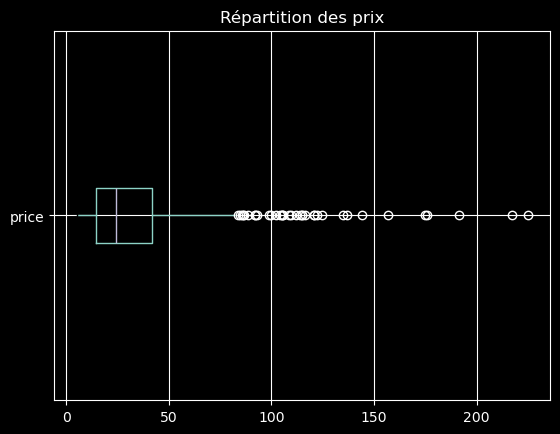

In [1744]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

erp.boxplot(column=['price'], vert=False)
plt.title('Répartition des prix')
plt.show()

In [1745]:
#Autre méthode avec plotly express
bm_price = px.box(erp, x='price', title='Répartition des prix', color_discrete_sequence=['orange'])

# Personnalisation du graphe
bm_price.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        dtick=10  # graduation de l'axe des x par pas de 10
    ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
    )
)

bm_price.show()

## Étude des outliers

In [1747]:
# Recherche des outliers

# Calcul des quartiles
Q1 = np.percentile(erp['price'].dropna(), 25)
Q3 = np.percentile(erp['price'].dropna(), 75)
IQ = Q3 - Q1

# Détection des outliers
outliers = erp[(erp['price'] < (Q1 - 1.5 * IQ)) | (erp['price'] > (Q3 + 1.5 * IQ))][['price', 'product_id']]
print()
print("Quartile 1:", Q1)
print("Quartile 3:", Q3)
print("IQR:", IQ)
print(f'''Outliers détectés {len(outliers)}:

{outliers['price'].sort_values().tolist()}"''' )
print()


Quartile 1: 14.5
Quartile 3: 42.0
IQR: 27.5
Outliers détectés 36:

[83.7, 84.7, 85.6, 86.1, 86.8, 88.4, 92.0, 92.0, 93.0, 99.0, 100.0, 102.3, 104.0, 105.0, 105.0, 105.6, 108.5, 109.6, 112.0, 114.0, 115.0, 115.0, 116.4, 121.0, 121.0, 122.0, 124.8, 135.0, 137.0, 144.0, 157.0, 175.0, 176.0, 191.3, 217.5, 225.0]"



In [1748]:
# Visualisation des prix de vente et des prix d'achat des outliers
id_outliers=outliers['product_id'].tolist()
prix_vente_achat=(erp.loc[erp['product_id'].isin(id_outliers), ['product_id', 'price', 'purchase_price']].
                  sort_values('product_id', ascending=True)
                 )
# Création d'une colonne prix_de_vente - prix_d'achat
prix_vente_achat['vente_moins_achat']=round((prix_vente_achat['price'] / 1.2) - prix_vente_achat['purchase_price'], 2)
print()
print(f'''Différence prix de vente - prix d'achat des outliers maximum: {prix_vente_achat['vente_moins_achat'].max()}
Différence prix de vente - prix d'achat des outliers minimum: {prix_vente_achat['vente_moins_achat'].min()}
Moyenne de prix de vente - prix d'achat des outliers: {round(prix_vente_achat.loc[prix_vente_achat['vente_moins_achat'] > 0,
                                                            'vente_moins_achat'].mean(), 1)}
''')


Différence prix de vente - prix d'achat des outliers maximum: 68.42
Différence prix de vente - prix d'achat des outliers minimum: -22.33
Moyenne de prix de vente - prix d'achat des outliers: 37.9



#### Études des résultats négatifs

In [1750]:
# Visualisation des différences négatives
prix_vente_achat.loc[prix_vente_achat['vente_moins_achat'] < 0]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



,product_id,price,purchase_price,vente_moins_achat
724,6324,92.0,99.0,-22.33


In [1751]:
# Cet article disparaît de l'étude, il n'a pas de correspondance dans la table 'liaison'
display(liaison.loc[liaison['product_id'].between(6320, 6330)])
display(liaison.loc[liaison['product_id'] == 6324])
display(df_merge.loc[df_merge['product_id'] == 6324])

,id_web,product_id
725,15678,6325
727,15810,6328


,id_web,product_id


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance


#### À quelles catégories appartiennent ces outliers

In [1753]:
liste_id_outliers=outliers['product_id'].tolist()
df_merge.loc[df_merge['product_id'].isin(liste_id_outliers)]['product_type'].value_counts()

product_type
Vin          19
Champagne     6
Cognac        4
Whisky        3
Name: count, dtype: int64

In [1754]:
# Quels sont ces outliers?
df_merge.loc[df_merge['product_id'].isin(liste_id_outliers), 'post_name']

63     zind-humbrecht-riesling-gc-rangen-thann-clos-s...
65     zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
199       champagne-egly-ouriet-grand-cru-millesime-2008
205    champagne-larmandier-bernier-grand-cru-vieille...
218                                 cognac-frapin-vip-xo
219                           cognac-frapin-fontpinot-xo
221       cognac-frapin-chateau-de-fontpinot-1989-20-ans
222                            cognac-frapin-cigar-blend
227    chateau-de-puligny-montrachet-1cru-champ-canet...
380    domaine-des-croix-corton-grand-cru-les-greves-...
381    domaine-des-croix-corton-charlemagne-grand-cru...
426       david-duband-charmes-chambertin-grand-cru-2014
431    domaine-des-comtes-lafon-volnay-1er-cru-santen...
432    domaine-des-comtes-lafon-volnay-1er-cru-santen...
437    champagne-agrapart-fils-lavizoise-grand-cru-20...
438    champagne-agrapart-fils-mineral-extra-brut-bla...
502                        tempier-bandol-cabassaou-2017
506    lucien-boillot-puligny-m

## Étude du CA des outliers dans l'étape 5.1 'Analyse des ventes en CA'

## Étude des non outliers

In [1757]:
erp_vente_achat=(erp.loc[~erp['product_id'].isin(id_outliers), ['product_id', 'price', 'purchase_price']].
                  sort_values('product_id', ascending=True)
                 )
# Création d'une colonne prix_de_vente - prix_d'achat
erp_vente_achat['vente_moins_achat']=round((erp_vente_achat['price'] / 1.2) - erp_vente_achat['purchase_price'], 2)
print()
print(f'''Différence prix de vente - prix d'achat des non outliers maximum: {erp_vente_achat['vente_moins_achat'].max()}
Différence prix de vente - prix d'achat des non outliers minimum: {erp_vente_achat['vente_moins_achat'].min()}
Moyenne de prix de vente - prix d'achat des non outliers: {round(erp_vente_achat.loc[erp_vente_achat['vente_moins_achat'] > 0,
                                                                 'vente_moins_achat'].mean(), 1)}
''')



Différence prix de vente - prix d'achat des non outliers maximum: 28.24
Différence prix de vente - prix d'achat des non outliers minimum: -66.94
Moyenne de prix de vente - prix d'achat des non outliers: 8.9



#### Étude des résultats négatifs

In [1759]:
# visualisation des différences négatives
erp_vente_achat.loc[erp_vente_achat['vente_moins_achat'] < 0]

,product_id,price,purchase_price,vente_moins_achat
210,4355,12.65,77.48,-66.94
391,4864,8.30,9.99,-3.07
817,7196,31.00,31.20,-5.37


In [1760]:
df_merge['product_id'].apply(type).value_counts()

product_id
<class 'int'>    714
Name: count, dtype: int64

In [1761]:
# Ces articles disparaîssent de l'étude
difference_negative = [4335, 4864, 7196]
#display(liaison.loc[liaison['product_id'].isin(difference_negative)])
display(liaison.loc[liaison['product_id'].isin(difference_negative)])
display(df_merge.loc[df_merge['product_id'].isin(difference_negative)])

,id_web,product_id
391,15154,4864


,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance


In [1762]:
df_merge.loc[df_merge['sku'] == '15154']

,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance


## Étude du taux de marge des outliers dans l'étape 5.4' 'Analyse du taux de marge'


#### Bien que les différences entre les prix de vente et les prix d'achat montrent une plus grande amplitude pour les outliers, l'étude des taux de marge des outliers et des non outliers ne montre pas d'abération

Taux de marge des outliers maximum: 91.4\
Taux de marge des outliers minimum: 36.1

Taux de marge des non outliers maximum: 91.4\
Taux de marge des non outliers minimum: 29.5

#### Il n'y a visiblement pas de prix aberrants.

## Étude par l'utilisation de méthodes statistiques

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [1768]:
#Calculer la moyenne du prix  
print()
print(f'Prix moyen: {(prix_moyen := round(erp['price'].mean(), 2))} €')
#Calculer l'écart-type du prix
print(f'Ecart type du prix: {(prix_std := round(erp['price'].std(),2))} ')
#Calculer le Z-score
print(f'''Z-score: 
{(prix_z_score := ((erp['price'] - prix_moyen) / prix_std).head())}''')
print()


Prix moyen: 32.28 €
Ecart type du prix: 26.6 
Z-score: 
0   -0.303759
1    0.075940
2   -0.431579
3   -0.683459
4    0.515789
Name: price, dtype: float64



In [1769]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_prix=erp.loc[(erp['price'] - prix_moyen) / prix_std > 3, 'price'].min()
print()
print(f'Le seuil minimum de prix pour lequel le Z-sore est supérieur à 3: {seuil_prix} ')
print()


Le seuil minimum de prix pour lequel le Z-sore est supérieur à 3: 114.0 



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [1771]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
erp['price'].describe()

count    825.000000
mean      32.277636
std       26.603196
min        5.200000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [1772]:
#Définissez un seuil pour les articles "outliers" en prix
print()
print(f'''Les valeurs inférieures à Q1 - 1,5 x IQ et supérieures à Q3 + 1,5 x IQ sont considérées comme
des outliers, Q1 et Q3 étant les premiers et troisième quartiles, et l'intervalle inter quartile IQ = Q3 - Q1''')
print()


Les valeurs inférieures à Q1 - 1,5 x IQ et supérieures à Q3 + 1,5 x IQ sont considérées comme
des outliers, Q1 et Q3 étant les premiers et troisième quartiles, et l'intervalle inter quartile IQ = Q3 - Q1



In [1773]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Calcul des quartiles
Q1 = erp['price'].quantile(0.25)
Q3 = erp['price'].quantile(0.75)
IQ = Q3 - Q1
# Cacul des outliers
outlier = erp[(erp['price'] < Q1 - 1.5 * IQ) | (erp['price'] > Q3 + 1.5 * IQ)]['price']
# Nombre d'outliers
nombre_outlier = len(outlier)
# Proportion d'outliers
proportion_outlier = round(nombre_outlier / len(erp['price']) * 100, 1 )
print()
print(f'''Nombre d\'outliers dans la colonne prix: {nombre_outlier} \n
Proportion d'outliers dans la colonne prix: {proportion_outlier}% ''' )
print()


Nombre d'outliers dans la colonne prix: 36 

Proportion d'outliers dans la colonne prix: 4.4% 



In [1774]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
# Modification du type de données de la colonne priced de la table rep_liaison_web avec copie de la table
liste_outlier = outlier.tolist()
produit_outlier = df_merge.loc[df_merge['price'].isin(liste_outlier), ['price', 'product_type', 'post_name']]
print()
print(f'''Outlier maximum: {outlier.max()}\n
Outlier minimum: {outlier.min()}\n
Liste des outliers: {liste_outlier} \n
Liste des produits dont les prix sont des outliers \n 
{produit_outlier}
''')
print('*' * 91)
print()
print('''Les prix considérés comme des outliers ne semblent pas aberrants pour des vins ou champagne, \n
d\'autre part, ils correspondent à des champages ou des vins prestigieux.''')
print()
print('*' * 91)
print()


Outlier maximum: 225.0

Outlier minimum: 83.7

Liste des outliers: [86.1, 100.0, 88.4, 225.0, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 144.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 84.7, 92.0, 83.7, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0, 92.0] 

Liste des produits dont les prix sont des outliers 
 
     price product_type                                          post_name
63   100.0          Vin  zind-humbrecht-riesling-gc-rangen-thann-clos-s...
65    88.4          Vin  zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
199  225.0    Champagne     champagne-egly-ouriet-grand-cru-millesime-2008
205   85.6    Champagne  champagne-larmandier-bernier-grand-cru-vieille...
218  176.0       Cognac                               cognac-frapin-vip-xo
219  108.5       Cognac                         cognac-frapin-fontpinot-xo
221  157.0       Cognac     cognac-frapin-chateau-de-fontpinot-1989-20-ans
222  104.0       Cognac          

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [1777]:
##############################
# Calculer le CA su site web # 
##############################
#Créez une colonne calculant le CA par article
df_merge['ca_par_produit'] = df_merge['price'] * df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
print()
print(f'Chiffre d\'affaire total: {round(df_merge['ca_par_produit'].sum(),0)}  ')
print()
#Ce résultat correspond au chiffre d'affaire du site web


Chiffre d'affaire total: 143680.0  



In [1778]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge = df_merge.sort_values('ca_par_produit', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge = df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en CA
print(df_merge[['price', 'total_sales', 'product_type', 'ca_par_produit']].head(20))
#Graphique en barre des 20 premiers articles avec plotly express
top_20_ca=df_merge.sort_values('ca_par_produit', ascending=True).tail(20)
bar_top_20_ca = px.bar(top_20_ca, 
                       x='ca_par_produit', 
                       y='post_title', 
                       title='Top 20 des produits qui ont générés le plus de CA',
                       color='ca_par_produit', color_continuous_scale='oranges', 
                       range_color=(top_20_ca['ca_par_produit'].min(), top_20_ca['ca_par_produit'].max()),
                       text=top_20_ca['ca_par_produit']
                      )

# Fonction pour déterminer la couleur du texte en fonction de la luminosité de la barre
def couleur_valeur(value):
    # On prend une simple approche avec la luminosité en fonction de la valeur de la barre
    # Si la valeur (CA) est supérieure à un certain seuil, on change la couleur du texte
    quantile=np.percentile(top_20_ca['ca_par_produit'], 95)
    if value > quantile:  
        return 'white'
    else:  
        return 'black'

# Appliquer le calcul de couleur sur chaque barre
bar_top_20_ca.update_traces(
    texttemplate='%{text:.0f} €',
    textposition='inside',  # Placer le texte à l'intérieur des barres
    textfont=dict(color=[couleur_valeur(val) for val in top_20_ca['ca_par_produit']])  # Dynamique selon CA
)

bar_top_20_ca.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        #zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        title='CA par article',
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=0,
        tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
                ),
    yaxis=dict(
        title='Article',
        #gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white', size=16),  # graduation en blanc
        ticklen=10,  # Longueur des ticks (qui est augmentée ici)
        ticks="outside",  # Permet de décaler les étiquettes de l'axe Y vers l'extérieur
        tickson="labels"  # S'assurer que les ticks ne sont pas sur la grille
                ),
    height=1000, width=1000,
                    )
bar_top_20_ca.show()

    price  total_sales product_type  ca_par_produit
0   225.0         11.0    Champagne          2475.0
1   191.3          6.0    Champagne          1147.8
2    79.5         14.0    Champagne          1113.0
3    41.2         20.0          Vin           824.0
4   115.0          7.0          Vin           805.0
5    86.8          9.0    Champagne           781.2
6   105.0          7.0          Vin           735.0
7   175.0          4.0          Vin           700.0
8   135.0          5.0    Champagne           675.0
9   112.0          6.0    Champagne           672.0
10  105.6          6.0          Vin           633.6
11  157.0          4.0       Cognac           628.0
12   28.5         22.0          Vin           627.0
13   77.0          8.0    Champagne           616.0
14   85.6          7.0    Champagne           599.2
15   99.0          6.0          Vin           594.0
16  116.4          5.0          Vin           582.0
17   79.5          7.0    Champagne           556.5
18   67.2   

In [1779]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['proportion_ca_%']=df_merge['ca_par_produit'] / df_merge['ca_par_produit'].sum() * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['proportion_ca_cumule']=df_merge['proportion_ca_%'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
article_80=df_merge.loc[df_merge['proportion_ca_cumule'] <= 80]
liste_article_80=article_80['proportion_ca_cumule'].tolist()
print()
print(f'{len(liste_article_80)} articles repréentent 80% du CA')
print()
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f'''Cela représente {round(len(liste_article_80 ) / len(df_merge['product_id']) * 100, 1)}% du catalogue général
''')
print()


434 articles repréentent 80% du CA

Cela représente 60.8% du catalogue général




In [1780]:
# Proportion de type de produit dans le top 20
round(top_20_ca['product_type'].value_counts(normalize=True)*100, 1)

product_type
Vin          45.0
Champagne    45.0
Cognac       10.0
Name: proportion, dtype: float64

In [1781]:
# Prix de vente moyen des articles qui représentent 80% du CA
print()
print(f'Prix moyen des articles qui repréentent 80% du CA: {round(article_80['price'].mean(), 1)}  ')
print()


Prix moyen des articles qui repréentent 80% du CA: 39.0  



In [1782]:
df_merge.columns

Index(['index', 'product_id', 'onsale_web', 'price', 'stock_quantity',
       'stock_status', 'purchase_price', 'id_web', '_merge', 'sku',
       'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'product_type', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type',
       'correspondance', 'ca_par_produit', 'proportion_ca_%',
       'proportion_ca_cumule'],
      dtype='object')

In [1783]:
# Bénéfice réalisé par les ventes des articles
# Création d'une colonne 'cout_par_article'
df_merge['cout_par_article'] = df_merge['purchase_price'] * df_merge['total_sales']
# Bénéfice réalisé pas la vente des articles
print()
print(f'''Bénéfice réalisé pas la vente de ces articles: {round(df_merge['ca_par_produit'].sum() - df_merge['cout_par_article'].sum(), 0)}
''')
print()


Bénéfice réalisé pas la vente de ces articles: 68607.0




## Étude du CA générés par les outliers

In [1785]:
ca_outliers=df_merge.loc[df_merge['product_id'].isin(id_outliers)]['ca_par_produit'].sum()
benefice_outliers=ca_outliers - df_merge.loc[df_merge['product_id'].isin(id_outliers)]['cout_par_article'].sum()
pct_ca_outliers=round(ca_outliers / df_merge['ca_par_produit'].sum() * 100, 1)
pct_benefice_outliers=(round(benefice_outliers / (df_merge['ca_par_produit'].sum() - df_merge['cout_par_article'].sum())
                      *100, 1)
                     )
print()
print(f'''Chiffre d'affaire des outliers: {round(ca_outliers, 2)}
Bénéfice pour les outliers: {round(benefice_outliers, 2)}
Pourcentage du chiffre d'affaire généré par les outliers sur le chiffre d'affaire total: {pct_ca_outliers}%
Pourcentage du bénéfice généré par les outliers sur le bénéfice total: {pct_benefice_outliers}%
''')
print()


Chiffre d'affaire des outliers: 16777.2
Bénéfice pour les outliers: 7727.0
Pourcentage du chiffre d'affaire généré par les outliers sur le chiffre d'affaire total: 11.7%
Pourcentage du bénéfice généré par les outliers sur le bénéfice total: 11.3%




## Analyse des ventes en quantité

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [1788]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge = df_merge.sort_values('total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True)
#Afficher les 20 premier articles en quantité
display(df_merge[['product_id', 'product_type', 'post_title', 'total_sales']].head(20))
#Graphique en barre des 20 premiers articles avec plotly express
top_20_quantite=df_merge.sort_values('total_sales').tail(20)
bar_top_20_quantite = px.bar(top_20_quantite, 
                       x='total_sales', 
                       y='post_title', 
                       title='Top 20 des produits les plus vendus en quantité',
                       color='total_sales', color_continuous_scale='oranges', 
                       range_color=(top_20_quantite['total_sales'].min(), top_20_quantite['total_sales'].max()),
                       text=top_20_quantite['total_sales']
                      )


# Fonction pour déterminer la couleur du texte en fonction de la luminosité de la barre
def couleur_valeur_quantite(value):
    # On prend une simple approche avec la luminosité en fonction de la valeur de la barre
    # Si la valeur (CA) est supérieure à un certain seuil, on change la couleur du texte
    quantile_quantite=np.percentile(top_20_quantite['total_sales'], 90)
    if value > quantile_quantite:  
        return 'white'
    else:  
        return 'black'

# Appliquer le calcul de couleur sur chaque barre

bar_top_20_quantite.update_traces(
    texttemplate='%{text:.0f} ',
    textposition='inside',  # Placer le texte à l'intérieur des barres
    textfont=dict(color=[couleur_valeur_quantite(val) for val in top_20_quantite['total_sales']])  # Dynamique selon CA
)

bar_top_20_quantite.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        #zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        title='Total des ventes',
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=0,
        tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
                ),
    yaxis=dict(
        title='Article',
        #gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white', size=16),  # graduation en blanc
        ticklen=10,  # Longueur des ticks (qui est augmentée ici)
        ticks="outside",  # Permet de décaler les étiquettes de l'axe Y vers l'extérieur
        tickson="labels"  # S'assurer que les ticks ne sont pas sur la grille
                ),
    height=1000, width=1000,
                    )
bar_top_20_quantite.show()

,product_id,product_type,post_title,total_sales
60,4867,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,36.0
142,4203,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,27.0
55,4275,Vin,I Fabbri Chianti Classico Lamole 2017,24.0
124,4726,Vin,François Baur Pinot Noir Schlittweg 2017,22.0
12,4647,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,22.0
3,5826,Vin,Agnès Levet Côte Rôtie Améthyste 2017,20.0
606,6129,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,20.0
251,4220,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,18.0
110,5803,Vin,Château Tour Haut-Caussan Médoc 2015,17.0
23,6569,Vin,Decelle-Villa Chorey-Lès-Beaune 2016,17.0


In [1789]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['proportion_quantite']=df_merge['total_sales'] / df_merge['total_sales'].sum() * 100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['proportion_quantite_cumule']=df_merge['proportion_quantite'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
quantite_80=df_merge.loc[df_merge['proportion_quantite_cumule'] <= 80]
print()
print(f'''{len(quantite_80)} articles représentent 80% des ventes en quantité,
''')
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print(f'''soit {round(len(quantite_80) / len(df_merge['product_id']) * 100, 1)}% du catalogue entier du site web
''')
print()


433 articles représentent 80% des ventes en quantité,

soit 60.6% du catalogue entier du site web




In [1790]:
# Nombre d'article vendus
print()
print(f'''Nombre total d'articles vandus: {df_merge['total_sales'].sum()}
''')
print()


Nombre total d'articles vandus: 5751.0




In [1791]:
# Pourcentage par catégorie dans le top 20
round(top_20_quantite['product_type'].value_counts(normalize=True)*100 ,1)

product_type
Vin    100.0
Name: proportion, dtype: float64

In [1792]:
# Quantité moyenne vendus pour lesproduits qui représentent 80% du volume
print()
print(f'''Quantité moyenne vendus pour les articles qui représentent 80% du volume: {round(quantite_80['total_sales'].mean(), 0)}
''')
print()


Quantité moyenne vendus pour les articles qui représentent 80% du volume: 11.0




In [1793]:
# Quels sont les articles qui sont à la fois dans le top 20 CA et dans le top 20 quantités? 
print()
print(f'''Articles qui se trouvent à la fois dans le top 20 CA et dans le top 20 quantités:
{df_merge.loc[(df_merge['product_id'].isin(top_20_ca['product_id'])) & (df_merge['product_id'].
                                                                        isin(top_20_quantite['product_id']))][['product_id', 'post_name']]}
''')


Articles qui se trouvent à la fois dans le top 20 CA et dans le top 20 quantités:
    product_id                                       post_name
12        4647  bernard-baudry-chinon-rouge-croix-boissee-2017
3         5826                      agnes-levet-amethyste-2017



## Analyse des stocks

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

,stock_quantity,total_sales,rotation_stock,post_title,mois_stock
0,125,4.0,0.032000,Champagne Gosset Grand Millésime 2006,31.25
1,138,5.0,0.036232,Champagne Gosset Célébris Vintage 2007,27.60
2,81,3.0,0.037037,Champagne Egly-Ouriet Premier Cru Les Vignes d...,27.00
3,125,5.0,0.040000,Champagne Egly-Ouriet Grand Cru Brut Tradition,25.00
4,71,3.0,0.042254,Champagne Mailly Grand Cru Brut Rosé,23.67
5,115,5.0,0.043478,Champagne Larmandier-Bernier Latitude,23.00
6,91,4.0,0.043956,Champagne Gosset Grand Rosé,22.75
7,136,6.0,0.044118,Champagne Agrapart &amp; Fils L'Avizoise Extra...,22.67
8,145,7.0,0.048276,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,20.71
9,123,6.0,0.048780,Champagne Mailly Grand Cru Intemporelle 2010,20.50


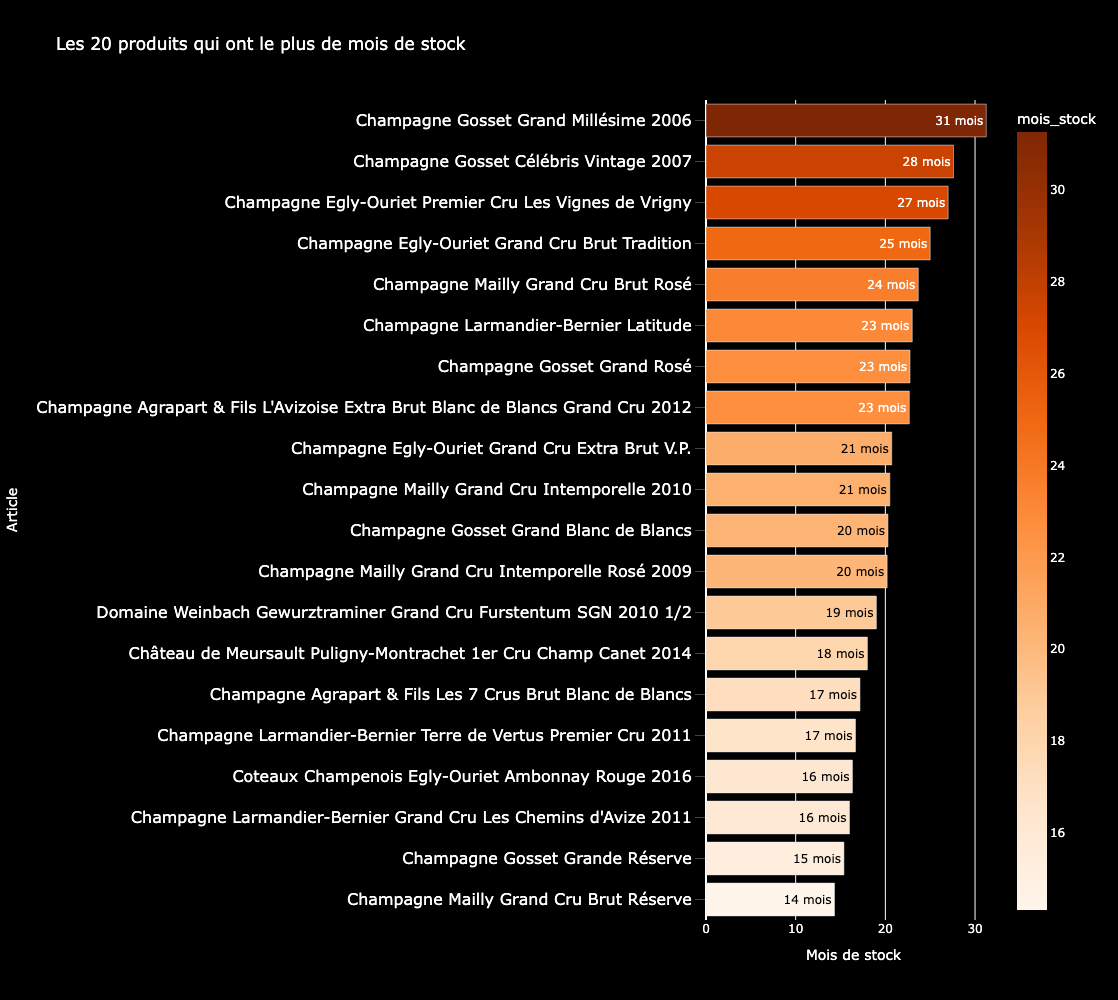

In [2018]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
# Fait en début de Notebook
#Création de la colonne Rotation de stock
df_merge['rotation_stock']=df_merge['total_sales'] / df_merge['stock_quantity']
#Remplacement des "inf" par 0
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace([np.inf, -np.inf], 0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge['mois_stock'] = round(df_merge['stock_quantity'] / df_merge['total_sales'],2)
df_merge['mois_stock'] = df_merge['mois_stock'].replace([np.inf, -np.inf], 0)
df_merge = df_merge.sort_values('mois_stock', ascending=False).reset_index()
display(df_merge[['stock_quantity', 'total_sales', 'rotation_stock', 'post_title',
                'mois_stock']].head(20))
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
flop_20_stock=df_merge[df_merge['mois_stock'].notna()].sort_values('mois_stock', ascending=True).tail(20)
bar_flop_20_stock = px.bar(flop_20_stock, 
                       x='mois_stock', 
                       y='post_title', 
                       title='Les 20 produits qui ont le plus de mois de stock',
                       color='mois_stock', color_continuous_scale='oranges', 
                       range_color=(flop_20_stock['mois_stock'].min(), flop_20_stock['mois_stock'].max()),
                       text=flop_20_stock['mois_stock']
                      )


# Fonction pour déterminer la couleur du texte en fonction de la luminosité de la barre
def couleur_valeur_stock(value):
    # On prend une simple approche avec la luminosité en fonction de la valeur de la barre
    # Si la valeur (CA) est supérieure à un certain seuil, on change la couleur du texte
    quantile_stock=np.percentile(flop_20_stock['mois_stock'], 60)
    if value > quantile_stock:  
        return 'white'
    else:  
        return 'black'

# Appliquer le calcul de couleur sur chaque barre

bar_flop_20_stock.update_traces(
    texttemplate='%{text:.0f} mois',
    textposition='inside',  # Placer le texte à l'intérieur des barres
    textfont=dict(color=[couleur_valeur_stock(val) for val in flop_20_stock['mois_stock']])  # Dynamique selon CA
)

bar_flop_20_stock.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        #zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        title='Mois de stock',
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=0,
        tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
                ),
    yaxis=dict(
        title='Article',
        #gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white', size=16),  # graduation en blanc
        ticklen=10,  # Longueur des ticks (qui est augmentée ici)
        ticks="outside",  # Permet de décaler les étiquettes de l'axe Y vers l'extérieur
        tickson="labels"  # S'assurer que les ticks ne sont pas sur la grille
                ),
    height=1000, width=1000,
                    )
bar_flop_20_stock.show()

In [1797]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
#df_merge['purchase_price']=df_merge['purchase_price'].str.replace(',', '.').astype(float)
df_merge['valorisation_stock'] = df_merge['stock_quantity'] * df_merge['purchase_price']
#Calculer la somme de la colonne "Valorisation_stock_euros"
print()
print(f'Valorisation du stock total: {(round(df_merge['valorisation_stock'].sum(), 0)) / 1000} mille euros ')
print()


Valorisation du stock total: 277.328 mille euros 



In [1798]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print()
print(f'Nombre de produit en stock: {df_merge['stock_quantity'].sum()} ')
print()


Nombre de produit en stock: 16740 



In [1799]:
# Proportion par type de produit du flop 20
round(flop_20_stock['product_type'].value_counts(normalize=True) * 100, 1)

product_type
Vin       95.0
Whisky     5.0
Name: proportion, dtype: float64

In [1800]:
# Nombre d'articles ayant plus de 3 mois de stock
print()
print(f'''Nombre d'articles ayant plus de 3 mois de stock: {len(df_merge.loc[df_merge['mois_stock'] > 3])}
Soit {round(len(df_merge.loc[df_merge['mois_stock'] > 3]) / len(df_merge.loc[df_merge['stock_status'] == 'instock']) * 100,1)}% du catalogue
''')


Nombre d'articles ayant plus de 3 mois de stock: 177
Soit 26.5% du catalogue



In [1801]:
# Valorisation des articles qui ont plus de 3 mois de stock
stock_3_mois=df_merge.loc[df_merge['mois_stock'] > 3].copy()
stock_3_mois['valeur_marchande'] = stock_3_mois['stock_quantity'] * stock_3_mois['price']
stock_3_mois['valeur_financiere'] = stock_3_mois['stock_quantity'] * stock_3_mois['purchase_price']
# Valorisation marchande de ces articles 
print()
print(f'''Valorisation marchande des articles qui ont plus de 3 mois de stock: {round(stock_3_mois['valeur_marchande'].sum(),0)}
Valorisation finançière des articles qui ont plus de 3 mois de stock: {round(stock_3_mois['valeur_financiere'].sum(),0)}
''')
print()


Valorisation marchande des articles qui ont plus de 3 mois de stock: 277883.0
Valorisation finançière des articles qui ont plus de 3 mois de stock: 157866.0




In [2056]:
# Les flop_20_stock sont ils parmi les articles qui font le plus de chiffre d'affaire ou 
# permi les articles les plus vendus? 
liste_flop=flop_20_stock['product_id'].tolist()
liste_top_ca=top_20_ca['product_id'].tolist()
liste_top_quantite=top_20_quantite['product_id'].tolist()

flop_top_ca=list(set(liste_flop) & set(liste_top_ca))
flop_top_quantite=list(set(liste_flop) & set(liste_top_quantite))
print()
print(f'''Articles parmi les 20 aticles ayant le plus de mois de stock et parmi les 20 articles qui génèrent le plus de CA:
{df_merge.loc[df_merge['product_id'].isin(flop_top_ca), 'post_title']}
''')
print(f'''Articles parmi les 20 aticles ayant le plus de mois de stock et parmi les 20 articles les plus vendus:
{df_merge.loc[df_merge['product_id'].isin(flop_top_quantite), 'post_title']}
''')


Articles parmi les 20 aticles ayant le plus de mois de stock et parmi les 20 articles qui génèrent le plus de CA:
1                Champagne Gosset Célébris Vintage 2007
7     Champagne Agrapart &amp; Fils L'Avizoise Extra...
8       Champagne Egly-Ouriet Grand Cru Extra Brut V.P.
16    Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
17    Champagne Larmandier-Bernier Grand Cru Les Che...
Name: post_title, dtype: object

Articles parmi les 20 aticles ayant le plus de mois de stock et parmi les 20 articles les plus vendus:
Series([], Name: post_title, dtype: object)



## Analyse du taux de marge

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [1804]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix_ht'] = df_merge['price'] / 1.2
#Création de la colonne Taux de marge
df_merge['taux_marge'] = round((df_merge['prix_ht'] - df_merge['purchase_price']) / df_merge['purchase_price'] * 100, 1)
#Afficher le prix minimum de la colonne "taux_marge"
taux_marge_mini=df_merge['taux_marge'].min()
produit_mini=df_merge.loc[df_merge['taux_marge'] == taux_marge_mini]
print()
for _, row in produit_mini.iterrows():
    print(f'📉 Taux de marge minimum: {taux_marge_mini: .1f}%')
    print(f'Prix correspondant à ce taux minimum: {row['price']}€')
    print(f'Produit correspondant: {row['post_title']}')
print()
#Afficher le prix maximum de la colonne "taux_marge"
taux_marge_maxi=df_merge['taux_marge'].max()
produit_maxi=df_merge.loc[df_merge['taux_marge'] == taux_marge_maxi]
for _, row in produit_maxi.iterrows():
    print()
    print(f'📈 Taux de marge maximum: {taux_marge_maxi: .1f}% ')
    print(f'Prix correspondant à ce taux de marge maximum: {row['price']}€ ')
    print(f'Produit correspondant: {row['post_title']} ')
print()


📉 Taux de marge minimum: -86.4%
Prix correspondant à ce taux minimum: 12.65€
Produit correspondant: Champagne Egly-Ouriet Grand Cru Blanc de Noirs


📈 Taux de marge maximum:  91.4% 
Prix correspondant à ce taux de marge maximum: 62.5€ 
Produit correspondant: Cognac Frapin VSOP 

📈 Taux de marge maximum:  91.4% 
Prix correspondant à ce taux de marge maximum: 93.0€ 
Produit correspondant: Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde 



In [1805]:
#affichage de la ligne avec un taux de marge inférieur à 0
pd.set_option('display.max_columns', None)
df_merge.loc[df_merge['taux_marge'] < 0]

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance,ca_par_produit,proportion_ca_%,proportion_ca_cumule,cout_par_article,proportion_quantite,proportion_quantite_cumule,rotation_stock,mois_stock,valorisation_stock,prix_ht,taux_marge
691,711,202,4355,1,12.65,97,instock,77.48,12589,both,12589,0.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,7515.56,10.541667,-86.4


In [1806]:
#création d'un dataframe avec les taux positifs
df_merge = df_merge.loc[df_merge['taux_marge'] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
taux_marge_mini_positif=df_merge['taux_marge'].min()
produit_mini_positif=df_merge.loc[df_merge['taux_marge'] == taux_marge_mini_positif]
print()
for _, row in produit_mini_positif.iterrows():
    print(f'📉 Taux de marge minimum: {taux_marge_mini_positif: .1f}%')
    print(f'Prix correspondant à ce taux minimum: {row['price']}€')
    print(f'Produit correspondant: {row['post_title']}')
print()
#Afficher le prix maximum de la colonne "taux_marge"
taux_marge_maxi_positif=df_merge['taux_marge'].max()
produit_maxi_positif=df_merge.loc[df_merge['taux_marge'] == taux_marge_maxi_positif]
for _, row in produit_maxi_positif.iterrows():
    print()
    print(f'📈 Taux de marge maximum: {taux_marge_maxi_positif: .1f}% ')
    print(f'Prix correspondant à ce taux de marge maximum: {row['price']}€ ')
    print(f'Produit correspondant: {row['post_title']} ')
print()


📉 Taux de marge minimum:  29.5%
Prix correspondant à ce taux minimum: 13.1€
Produit correspondant: Huile d'Olive Extra Vierge Planeta 50cl


📈 Taux de marge maximum:  91.4% 
Prix correspondant à ce taux de marge maximum: 62.5€ 
Produit correspondant: Cognac Frapin VSOP 

📈 Taux de marge maximum:  91.4% 
Prix correspondant à ce taux de marge maximum: 93.0€ 
Produit correspondant: Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde 



In [1807]:
#création d'un dataframe avec le taux de marge moyen par type de produit
type_produit = df_merge.groupby('product_type').agg({'taux_marge':'mean'}).sort_values('taux_marge', ascending = False).reset_index()
#Affichage dans un graphique du taux de marge par type de produit
taux_marge_moyen = px.bar(type_produit, x='product_type', y='taux_marge', title='Taux de marge moyen par type de procuit',
               color='taux_marge', color_continuous_scale='oranges')

taux_marge_moyen.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=-0,
        tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
        tickvals=type_produit['product_type'],  # Valeurs de l'axe X basées sur les noms de produits
        ticktext=type_produit['product_type']  # Utilise les noms des produits comme texte
                ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
                ),
    height=800, width=1000
                    )
taux_marge_moyen.show()

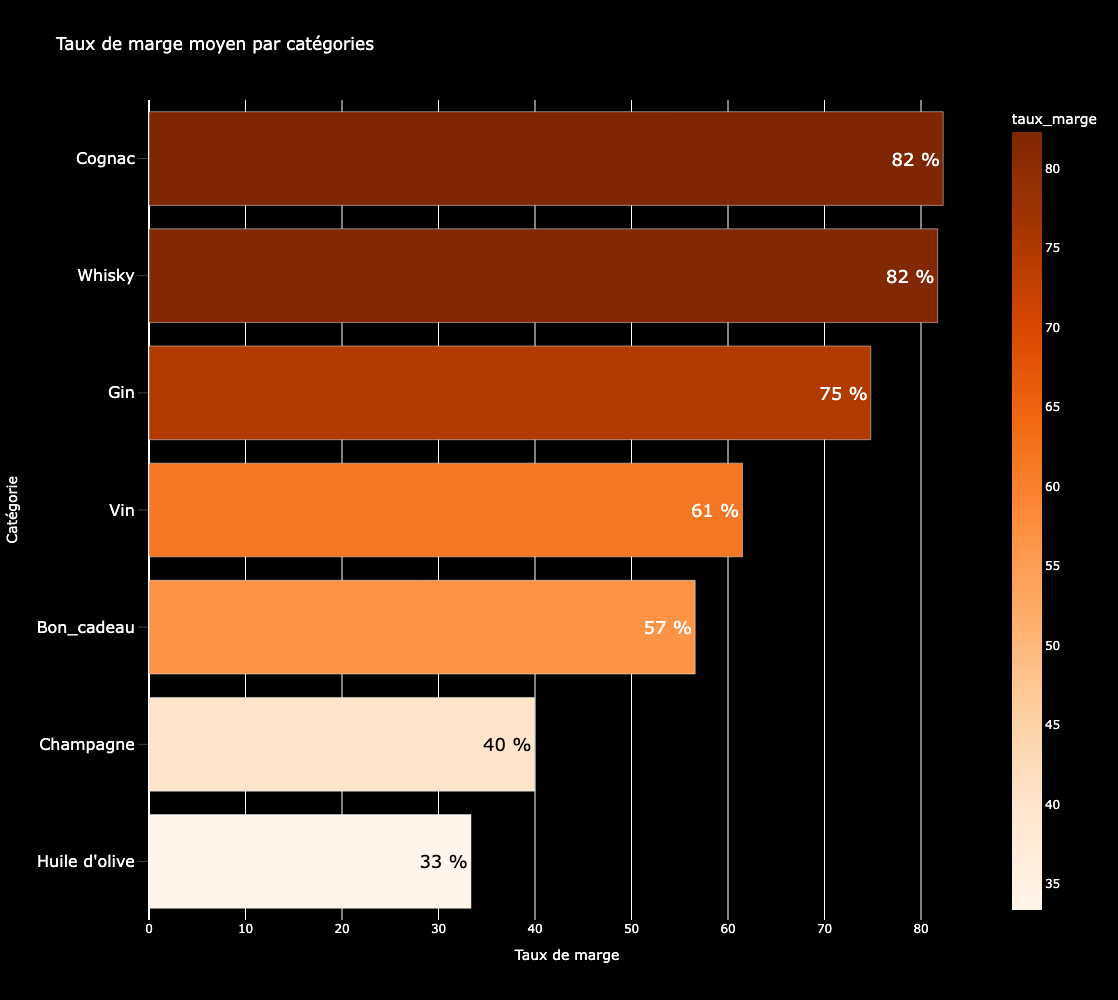

In [2036]:
#création d'un dataframe avec le taux de marge moyen par type de produit
type_produit = df_merge.groupby('product_type').agg({'taux_marge':'mean'}).sort_values('taux_marge', ascending = False).reset_index()
#Affichage dans un graphique du taux de marge par type de produit
taux_marge_moyen_h=type_produit.sort_values('taux_marge', ascending=True)
bar_taux_marge_moyen_h = px.bar(taux_marge_moyen_h, 
                       x='taux_marge', 
                       y='product_type', 
                       title='Taux de marge moyen par catégories',
                       color='taux_marge', color_continuous_scale='oranges', 
                       range_color=(taux_marge_moyen_h['taux_marge'].min(), taux_marge_moyen_h['taux_marge'].max()),
                       text=taux_marge_moyen_h['taux_marge']
                      )


# Fonction pour déterminer la couleur du texte en fonction de la luminosité de la barre
def couleur_valeur_taux(value):
    # On prend une simple approche avec la luminosité en fonction de la valeur de la barre
    # Si la valeur (CA) est supérieure à un certain seuil, on change la couleur du texte
    quantile_taux=np.percentile(taux_marge_moyen_h['taux_marge'], 30)
    if value > quantile_taux:  
        return 'white'
    else:  
        return 'black'

# Appliquer le calcul de couleur sur chaque barre


bar_taux_marge_moyen_h.update_traces(
    texttemplate='%{text:.0f} %',
    textposition='inside',  # Placer le texte à l'intérieur des barres
    textfont=dict(color=[couleur_valeur_taux(val) for val in taux_marge_moyen_h['taux_marge']],  # Dynamique selon CA
                 size=18)  
)

bar_taux_marge_moyen_h.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        #zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        title='Taux de marge',
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=0,
        tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
                ),
    yaxis=dict(
        title='Catégorie',
        #gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white', size=16),  # graduation en blanc
        ticklen=10,  # Longueur des ticks (qui est augmentée ici)
        ticks="outside",  # Permet de décaler les étiquettes de l'axe Y vers l'extérieur
        tickson="labels"  # S'assurer que les ticks ne sont pas sur la grille
                ),
    height=1000, width=1000,
                    )
bar_taux_marge_moyen_h.show()

In [1808]:
# Taux de marge global
print(f'''Taux de marge global: {round(((df_merge['prix_ht'].sum() - df_merge['purchase_price'].sum()) / 
                                        df_merge['purchase_price'].sum())*100,1)}%
''')

Taux de marge global: 60.3%



In [1809]:
df_merge.head(1)

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance,ca_par_produit,proportion_ca_%,proportion_ca_cumule,cout_par_article,proportion_quantite,proportion_quantite_cumule,rotation_stock,mois_stock,valorisation_stock,prix_ht,taux_marge
0,240,70,4142,1,53.0,125,instock,32.15,11641,both,11641,4.0,taxable,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",publish,closed,closed,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,both,212.0,0.14755,56.290572,128.6,0.069553,96.800556,0.032,31.25,4018.75,44.166667,37.4


## Étude du taux de marge des outliers trouvés dans la section 'Analyse des ventes en CA'

In [1811]:
# Recherche des taux de marge maximum et minimum des outliers
taux_marge_outliers=(df_merge.loc[df_merge['product_id'].isin(id_outliers), ['product_id', 'taux_marge']].
                  sort_values('product_id', ascending=True)
                 )
display(taux_marge_outliers.head())
print()
print(f'''Taux de marge des outliers maximum: {taux_marge_outliers['taux_marge'].max()}
Taux de marge des outliers minimum: {taux_marge_outliers['taux_marge'].min()}
''')
print()

,product_id,taux_marge
24,4115,58.1
587,4132,66.3
677,4352,36.1
17,4359,37.4
36,4402,87.4



Taux de marge des outliers maximum: 91.4
Taux de marge des outliers minimum: 36.1




In [1812]:
# Visualisation des autres taux de marge
# Recherche des taux de marge maximum et minimum des outliers
taux_marge_no_outliers=(df_merge.loc[~df_merge['product_id'].isin(id_outliers), ['product_id', 'taux_marge']].
                  sort_values('product_id', ascending=True)
                 )
display(taux_marge_no_outliers.head())
print()
print(f'''Taux de marge des non outliers maximum: {taux_marge_no_outliers['taux_marge'].max()}
Taux de marge des non outliers minimum: {taux_marge_no_outliers['taux_marge'].min()}
''')
print()

,product_id,taux_marge
279,3847,56.6
635,3849,63.0
706,3850,62.9
410,4032,69.8
657,4039,61.3



Taux de marge des non outliers maximum: 91.4
Taux de marge des non outliers minimum: 29.5




In [1813]:
df_merge.loc[df_merge['taux_marge'] == 91.4]

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance,ca_par_produit,proportion_ca_%,proportion_ca_cumule,cout_par_article,proportion_quantite,proportion_quantite_cumule,rotation_stock,mois_stock,valorisation_stock,prix_ht,taux_marge
540,301,218,4401,1,62.5,5,instock,27.21,3506,both,3506,3.0,taxable,2.0,2018-03-22 11:13:24,2018-03-22 10:13:24,Cognac,Cognac Frapin VSOP,Ce VSOP à tout d'un grand cognac. Il a bénéfic...,publish,closed,closed,cognac-frapin-vsop,2020-08-04 09:30:14,2020-08-04 07:30:14,https://www.bottle-neck.fr/?post_type=product&...,product,both,187.5,0.130498,64.749433,81.63,0.052165,99.026256,0.6,1.67,136.05,52.083333,91.4
655,639,616,5916,1,93.0,1,instock,40.49,14774,both,14774,1.0,taxable,2.0,2019-04-04 16:39:24,2019-04-04 14:39:24,Whisky,Wemyss Malts Single Cask Scotch Whisky Chocola...,"305 bouteilles, 13 ans d'âge.\n\n<span title=""...",publish,closed,closed,wemyss-malts-single-cask-chocolate-moka-cake,2019-12-23 09:30:21,2019-12-23 08:30:21,https://www.bottle-neck.fr/?post_type=product&...,product,both,93.0,0.064727,97.421494,40.49,0.017388,99.878282,1.0,1.00,40.49,77.500000,91.4


In [1814]:
# Taux de marge de l'outlier le plus éloigné (price = 225)
print()
print(f'''Taux de marge de l'outlier le plus éloigné (price = 225): {df_merge.loc[df_merge['price'] == 225,
'taux_marge'].to_string(index=False)}
Différence prix de vente - prix d'achat de l'outlier le plus éloigné: {(df_merge.loc[df_merge['price'] == 225, 'price'] - 
df_merge.loc[df_merge['price'] == 225, 'purchase_price']).to_string(index=False)}
''' )


Taux de marge de l'outlier le plus éloigné (price = 225): 36.1
Différence prix de vente - prix d'achat de l'outlier le plus éloigné: 87.19



## Étude du taux de marge

In [1816]:
# Distribution des taux de marge
bm_taux_marge = px.box(df_merge, x='taux_marge', title='Distribution des taux de marge', color_discrete_sequence=['orange'])

# Personnalisation du graphe
bm_taux_marge.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        dtick=10  # graduation de l'axe des x par pas de 10
    ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
    )
)

bm_taux_marge.show()

In [1817]:
# Recherche des outliers

# Calcul des quartiles
Q1_taux_marge = np.percentile(df_merge['taux_marge'].dropna(), 25)
Q3_taux_marge = np.percentile(df_merge['taux_marge'].dropna(), 75)
IQ_taux_marge = Q3_taux_marge - Q1_taux_marge

# Détection des outliers
#erp_copy_no_na=erp_copy.dropna(subset=['price'])
outliers_taux_marge = (df_merge[(df_merge['taux_marge'] < (Q1_taux_marge - 1.5 * IQ_taux_marge)) | (df_merge['taux_marge'] > (Q3_taux_marge + 1.5
                                 * IQ_taux_marge))][['taux_marge', 'product_id']]
           )
print()
print("Quartile 1:", Q1_taux_marge)
print("Quartile 3:", Q3_taux_marge)
print("IQR:", IQ_taux_marge)
print(f'''Outliers détectés {len(outliers_taux_marge)}:

{outliers_taux_marge['taux_marge'].sort_values().tolist()}"''' )
print()


Quartile 1: 56.6
Quartile 3: 66.3
IQR: 9.699999999999996
Outliers détectés 35:

[29.5, 30.7, 34.6, 36.0, 36.0, 36.1, 36.1, 36.1, 36.1, 36.1, 37.4, 37.4, 37.4, 38.7, 38.7, 38.7, 40.0, 40.1, 40.1, 40.1, 41.4, 41.4, 81.8, 81.8, 81.8, 83.7, 85.5, 87.4, 87.4, 87.4, 87.4, 89.4, 89.4, 91.4, 91.4]"



In [1818]:
# A qeulle catégories appartiennent ces taus de marge? 
liste_id_outliers_taux_marge=outliers_taux_marge['product_id'].tolist()
df_merge.loc[df_merge['product_id'].isin(liste_id_outliers_taux_marge)]['product_type'].value_counts()

product_type
Champagne        19
Whisky            8
Cognac            5
Huile d'olive     3
Name: count, dtype: int64

In [1819]:
# Distribution des taux de marge des outliers
bm_taux_marge_outliers = (px.box(outliers_taux_marge, x='taux_marge', title='Distribution des taux de marge des outliers',
                                 color_discrete_sequence=['orange'])
                         )

# Personnalisation du graphe
bm_taux_marge_outliers.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        dtick=10  # graduation de l'axe des x par pas de 10
    ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
    )
)

bm_taux_marge_outliers.show()

In [1820]:
# Les outliers des taux de marge sont ils les mêmes que ceux des taux de marge? 
difference_outliers=pd.Index(outliers['product_id']).symmetric_difference(pd.Index(outliers_taux_marge['product_id']))
nombre_difference_outliers=len(difference_outliers)
print()
if nombre_difference_outliers == 0:
    print(f'Les outliers de taux de marge sont les mêmes que ceux de prix de vente')
else:
    print(f'''Il y a {nombre_difference_outliers} outliers qui se trouvent dans une seule des deux listes uniquement,
soit {len(outliers)+len(outliers_taux_marge) - nombre_difference_outliers} qui sont identiques.
Il est difficile de tirer des conclusions dans ce cas. 
    ''')



Il y a 49 outliers qui se trouvent dans une seule des deux listes uniquement,
soit 22 qui sont identiques.
Il est difficile de tirer des conclusions dans ce cas. 
    


## Étude des taux de marge par tranches

In [1822]:
print(f'Prix d\'achat minimum: {df_merge['purchase_price'].min()}    ')
print(f'Prix d\'achat maximum: {df_merge['purchase_price'].max()}  ')

Prix d'achat minimum: 2.74    
Prix d'achat maximum: 137.81  


In [1823]:
bins = [0, 20, 40, 60, 80, 100, 120, 140]
labels = ['<20', '20 - 40€', '40 - 60€', '60 - 80€', '80 - 100€', '100 - 120€', '120 - 140€']
df_merge['tranche_achat'] = pd.cut(df_merge['purchase_price'], bins=bins, labels=labels)
taux_moyen_tranche=df_merge.groupby('tranche_achat', observed=True)['taux_marge'].mean().reset_index()

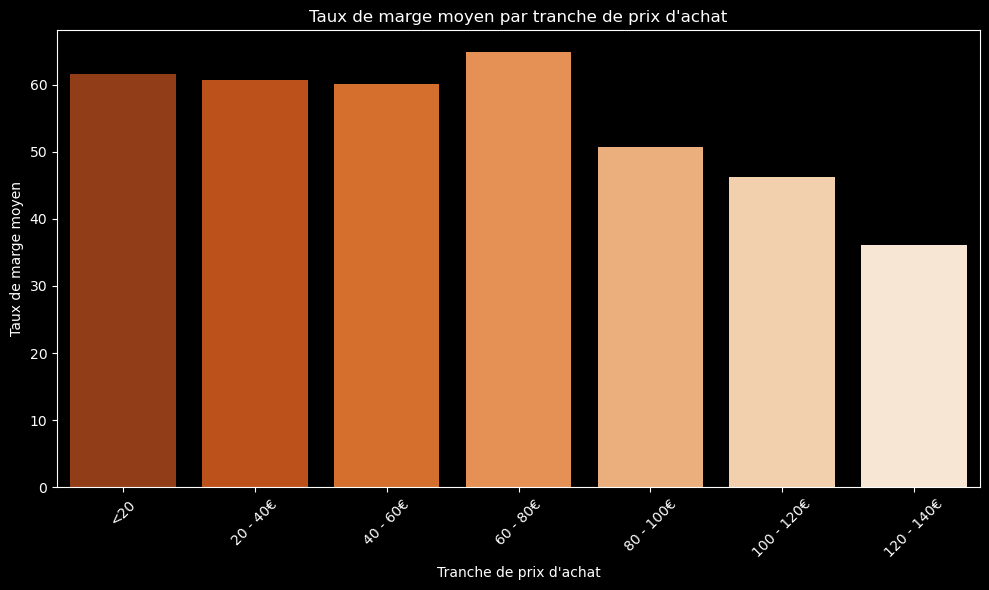

In [1824]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=taux_moyen_tranche, x='tranche_achat', y='taux_marge', hue='tranche_achat', 
            palette=sns.color_palette('Oranges', n_colors=7)[::-1])
plt.title("Taux de marge moyen par tranche de prix d'achat")
plt.xticks(rotation=45)
plt.ylabel("Taux de marge moyen")
plt.xlabel("Tranche de prix d'achat")
plt.tight_layout()
plt.show()


In [1825]:
fig=px.scatter(df_merge, x='price', y='taux_marge', animation_frame='product_type', color_discrete_sequence=['orange'],
               height=600, range_y=[0, 100]
          )
fig.update_layout(
    title="Relation entre taux de marge et prix d'achat", title_font_color='white',
    xaxis_title="Prix de vente", 
    yaxis_title="Taux de marge", 
    font_color='white',
    legend_font_color='white',
    plot_bgcolor='black',
    paper_bgcolor='black',
    height=600
)

## Analyse de corrélation 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [1828]:
pd.set_option('display.max_columns', None)
df_merge.head(1)

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance,ca_par_produit,proportion_ca_%,proportion_ca_cumule,cout_par_article,proportion_quantite,proportion_quantite_cumule,rotation_stock,mois_stock,valorisation_stock,prix_ht,taux_marge,tranche_achat
0,240,70,4142,1,53.0,125,instock,32.15,11641,both,11641,4.0,taxable,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",publish,closed,closed,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,both,212.0,0.14755,56.290572,128.6,0.069553,96.800556,0.032,31.25,4018.75,44.166667,37.4,20 - 40€


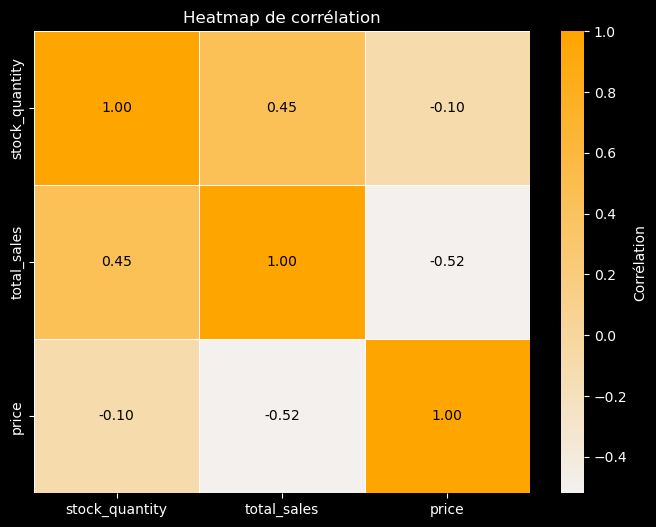

In [1829]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#Création d'un heatmap de correlation avec les variables stock, sales et price
# Sélection des varialbles
variables = ['stock_quantity', 'total_sales', 'price']
sous_tableau = df_merge[variables]
# Création de la matrice de corrélation
matrice_correlation=sous_tableau.corr()
# Fond noir
plt.style.use('dark_background')
# Création du heat map
plt.figure(figsize=(8,6))
# Utilisation d'une palette de dégradé orange
cmap = sns.light_palette('orange', as_cmap=True)
# Création du heat map
sns.heatmap(matrice_correlation, 
            annot=True,  # annot affiche les valeurs des corrélations
            cmap=cmap,  # cmap détermine la couleur
            fmt='.2f',  # fmt='.2f' pour un affichage avec 2 décimales
            linewidths=0.5,  # linewidths=0.5 sépare les cases
           annot_kws={'color':'black'},  # Chiffres blanc
           cbar_kws={'label':'Corrélation'}  # Légende de la barre
           )

plt.title('Heatmap de corrélation', color='white')
# Axe des labels en blanc
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#on peut également créer un mask pour n'afficher qu'une demi heatmap
# mask=np.tril(np.ones_like(matrice_correlation, dtype=bool))   .tril pour afficher la partie supérieure, triu pour la partie inférieure
# sns.heatmap(matrice_correlation, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [1830]:
#Que peut-on conclure des correlations ?
print()
print('Il n\'y a pas de corrélation entre ces variables. ')
print()


Il n'y a pas de corrélation entre ces variables. 



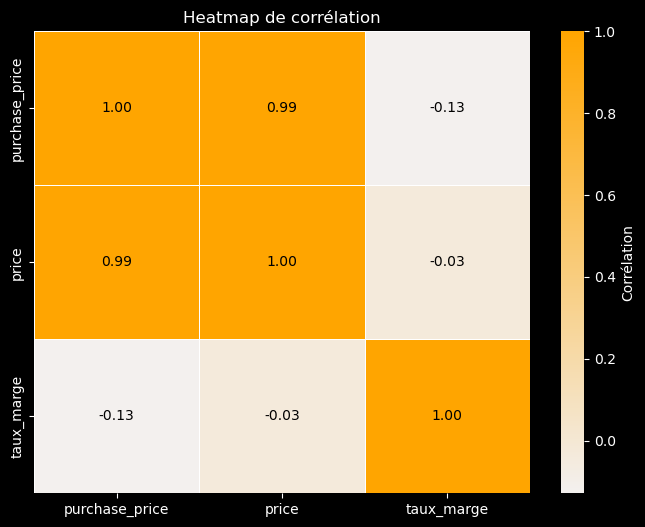

In [1831]:
# Existe t'il une corrélation entre le prix d'achat, le prix de vente et le taux de marge? 
variables_2 = ['purchase_price', 'price', 'taux_marge']
sous_tableau_2 = df_merge[variables_2]
# Création de la matrice de corrélation
matrice_correlation_2=sous_tableau_2.corr()
# Fond noir
plt.style.use('dark_background')
# Création du heat map
plt.figure(figsize=(8,6))
# Utilisation d'une palette de dégradé orange
cmap = sns.light_palette('orange', as_cmap=True)
# Création du heat map
sns.heatmap(matrice_correlation_2, 
            annot=True,  # annot affiche les valeurs des corrélations
            cmap=cmap,  # cmap détermine la couleur
            fmt='.2f',  # fmt='.2f' pour un affichage avec 2 décimales
            linewidths=0.5,  # linewidths=0.5 sépare les cases
           annot_kws={'color':'black'},  # Chiffres blanc
           cbar_kws={'label':'Corrélation'}  # Légende de la barre
           )

plt.title('Heatmap de corrélation', color='white')
# Axe des labels en blanc
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [1832]:
import scipy.stats as st
print (st.pearsonr(df_merge['price'], df_merge['purchase_price'] ))

PearsonRResult(statistic=0.9920982869064134, pvalue=0.0)


In [1833]:
# Visualisation entre prix de vente et prix d'achat
# Lien entre prix et nombre de vente
vente_achat = px.scatter(df_merge, x='purchase_price', y='price', color='taux_marge')
                              
vente_achat.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=-0,
        #tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
        #tickvals=df_merge['price'],  # Valeurs de l'axe X basées sur les noms de produits
                ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
                ),
    height=600, width=1000,
                    )

In [1834]:
# Existe t'il une corrélation entre le CA par produit et le taux de marge? 

In [1835]:
df_merge.head()

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,correspondance,ca_par_produit,proportion_ca_%,proportion_ca_cumule,cout_par_article,proportion_quantite,proportion_quantite_cumule,rotation_stock,mois_stock,valorisation_stock,prix_ht,taux_marge,tranche_achat
0,240,70,4142,1,53.0,125,instock,32.15,11641,both,11641,4.0,taxable,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",publish,closed,closed,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,https://www.bottle-neck.fr/?post_type=product&...,product,both,212.0,0.147550,56.290572,128.60,0.069553,96.800556,0.032000,31.25,4018.75,44.166667,37.4,20 - 40€
1,8,661,6126,1,135.0,138,instock,80.33,14923,both,14923,5.0,taxable,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,publish,closed,closed,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,675.0,0.469794,6.442089,401.65,0.086941,90.279951,0.036232,27.60,11085.54,112.500000,40.0,80 - 100€
2,400,203,4356,1,51.6,81,instock,31.00,12585,both,12585,3.0,taxable,2.0,2018-03-02 10:51:14,2018-03-02 09:51:14,Champagne,Champagne Egly-Ouriet Premier Cru Les Vignes d...,La cuvée Les Vignes de Vrigny est atypique dan...,publish,closed,closed,champagne-egly-ouriet-premier-cru-vrigny,2020-07-30 11:25:02,2020-07-30 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,154.8,0.107739,76.519434,93.00,0.052165,98.087289,0.037037,27.00,2511.00,43.000000,38.7,20 - 40€
3,106,198,4348,1,59.0,125,instock,34.76,12586,both,12586,5.0,taxable,2.0,2018-03-02 09:22:39,2018-03-02 08:22:39,Champagne,Champagne Egly-Ouriet Grand Cru Brut Tradition,"Un Champagne bien équilibré, dense, très éléga...",publish,closed,closed,champagne-egly-ouriet-tradition-grand-cru,2020-08-12 14:00:02,2020-08-12 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,both,295.0,0.205317,33.214621,173.80,0.086941,92.018779,0.040000,25.00,4345.00,49.166667,41.4,20 - 40€
4,572,74,4148,1,37.5,71,instock,21.88,1364,both,1364,3.0,taxable,2.0,2018-02-13 13:36:44,2018-02-13 12:36:44,Champagne,Champagne Mailly Grand Cru Brut Rosé,Une somptueuse robe rose lumineuse habille cet...,publish,closed,closed,champagne-mailly-grand-cru-brut-rose,2020-08-08 10:45:03,2020-08-08 08:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,both,112.5,0.078299,92.558329,65.64,0.052165,98.504608,0.042254,23.67,1553.48,31.250000,42.8,20 - 40€


# Analyse complémentaire sur les prix et le nombre de vente

In [1837]:
# Lien entre prix et nombre de vente
nuage_prix_vente = px.scatter(df_merge, x='price', y='total_sales', color='taux_marge')
                              
nuage_prix_vente.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=-0,
        #tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
        #tickvals=df_merge['price'],  # Valeurs de l'axe X basées sur les noms de produits
                ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
                ),
    height=600, width=1000,
                    )

In [1838]:
# Quelle catégorie se vend le plus? 
nuage_prix_vente = px.scatter(df_merge, x='price', y='total_sales', color='taux_marge', animation_frame='product_type')
                              
nuage_prix_vente.update_layout(
    paper_bgcolor='black',  # fond de la figure en noir
    plot_bgcolor='black',  # fond de la graphique en noir 
    font=dict(color='white'),  # Texte en blanc
    xaxis=dict(
        #gridcolor='cyan',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white'),  # graduation en blanc
        #dtick=10,  # graduation de l'axe des x par pas de 10
        tickangle=-0,
        #tickmode='array',  # Assure-toi que toutes les étiquettes sont visibles
        #tickvals=df_merge['price'],  # Valeurs de l'axe X basées sur les noms de produits
                ),
    yaxis=dict(
        gridcolor='orange',  # quadrillage en bleu vif
        zerolinecolor='deepskyblue',  # ligne zero en bleu vif
        tickfont=dict(color='white')  # graduation en blanc
                ),
    height=600, width=1000,
                    )

# Mettre à disposition la nouvelle table sur un fichier Excel

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [1841]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
# df_merge.to_excel('jointure.xlsx', index=False)